# Exploratory Data Analysis

<div class="alert alert-block alert-warning">
  
<b>Notebook objectives:</b>
    
* Better understand the data behavior using descriptive statistics and visual representations
    
    
* Identify data cleaning steps
    
    
* Identify potential features transformations or features to introduce    
    


# 1. Notebook set up

In [1]:
# Try downgrading pandas version if pcikle throws an error while loading
# !pip install pandas==1.4.1

In [2]:
###### Import packages

# Data handling
import numpy as np
import pandas as pd
import datetime as dt
#from IPython.display import HTML, Image #display formatted texts
import warnings
warnings.filterwarnings('ignore')

# Plotting packages

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn') # pretty graphs
import matplotlib.ticker as mticker
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter, FuncFormatter
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


# Files to pickle
import pickle
import bz2
import _pickle as cPickle

# sampling
from sklearn.model_selection import train_test_split

#pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Path set up
path = "/project/data/"
path_w1 = "/project/data/w1/"
path_w2 = "/project/data/w2/"
path_w3 = "/project/data/w3/"
path_w4 = "/project/data/w4/"
path_w5 = "/project/data/w5/"
path_feature = "/project/data/feature_importance/"
json_path = "/project/notebooks/map/KEYFILE.json"

# fixed values

seed = 2323
colors = {'c1':['blue', 'red'], 'c2': ['red', 'blue', 'grey', 'purple']}
bar_width = 0.3
bin_num = 25
size = {'small_tick': 9, 'tick': 10 , 'label': 14, 'sub_title': 16, 'main_title': 20}
fig_size = {'large': (30,25), 'small': (10, 5)}

# pandas display set up

pd.options.display.max_columns = None

### 1.1 Load samples data sets

In [3]:
# load pickled data for w1 and w2
pickled_data = bz2.BZ2File(path_w1 + 'strata_target_w1_5pct', 'rb')
w1_df = cPickle.load(pickled_data)
w1_df.drop(list(w1_df.filter(regex = 'ID')), axis = 1, inplace = True) # removes ID columns that do not hold explanatorry value
pickled_data.close()

pickled_data = bz2.BZ2File(path_w2 + 'strata_target_w2_5pct', 'rb')
w2_df = cPickle.load(pickled_data)
w2_df.drop(list(w2_df.filter(regex = 'ID')), axis = 1, inplace = True) # removes ID columns that do not hold explanatorry value
pickled_data.close()

In [4]:
# concatenate data sets
n_df = pd.concat([w1_df,w2_df], ignore_index = True)

In [5]:
# make a new reference to the data set
data = n_df
print(F'Sample data set size:\n\
{data.shape[0]} rows\n\
{data.shape[1]} columns')

Sample data set size:
3924294 rows
41 columns


In [6]:
# load pickled data for w1 and w2
pickled_data = bz2.BZ2File(path_feature + 'X_complete_w2_1pct', 'rb')
X_complete = cPickle.load(pickled_data)
X_complete.drop(list(X_complete.filter(regex = 'ID')), axis = 1, inplace = True) # removes ID columns that do not hold explanatorry value
pickled_data.close()


# load pickled data for w1 and w2
pickled_data = bz2.BZ2File(path_feature + 'y_complete_w2_1pct', 'rb')
y_complete = cPickle.load(pickled_data)
pickled_data.close()

# 2. Data understanding

- Understand data set instances and features
- Features definition
- Fixing data errors and handling data types
- Assess data cleaning needs (i.e, NaNs, format transformations, etc.)
- Changing features name to ease future referencing

## 2.1 Preliminary data understanding

In [6]:
# data set preview
data.head(2)

Advertiser Currency        Date Time of Day  Advertiser  \
0                 GBP  2022/04/20          13  OceanSaver   
1                 GBP  2022/04/20          22  OceanSaver   

                           Campaign                       Insertion Order  \
0  OceanSaver_UK_2022_March_Web_CPA  OceanSaver_PROS_DIS_UK_CustomAlgoCPA   
1  OceanSaver_UK_2022_March_Web_CPA  OceanSaver_PROS_DIS_UK_CustomAlgoCPA   

                                       Line Item     Line Item Type  \
0  CustomAlgo_PROS_DIS_MWeb_ALGO_PureProspecting  Real-time bidding   
1  CustomAlgo_PROS_DIS_MWeb_ALGO_PureProspecting  Real-time bidding   

          Platform  Device Type           Device Make  \
0  Bid Manager 2.0  Smart Phone  Samsung (All Models)   
1  Bid Manager 2.0  Smart Phone  Samsung (All Models)   

                    Device Model Operating System        Browser  \
0   Samsung Galaxy S9 (SM-G960F)     Android 10.0  Google Chrome   
1  Samsung Galaxy A71 (SM-A715F)     Android 11.0  Google Chrome   

       ISP or Carrier               Environment Creative Type  \
0  SuperCarrier in GB  Web optimized for device      Standard   
1        Mobile Other  Web optimized for device      Standard   

                           Creative Creative Size  \
0  SPRING-MOBILE-STICKY-BANNER-opt2        320x50   
1  SPRING-MOBILE-STICKY-BANNER-opt2        320x50   

                           App/URL Channel Type  \
0  dailymail.co.uk/home/index.html          RTB   
1              liverpoolecho.co.uk          RTB   

                                         Channel           Exchange  \
0        Top 2000 US Sites for Nielsen Video Ads          BidSwitch   
1  Top 2000 Global Sites for Nielsen Display Ads  Google Ad Manager   

                             Inventory Source     Ad Position   Ad Type  \
0                               The MediaGrid         Unknown  Standard   
1  Unknown or Unpermissioned Inventory Source  ABOVE_THE_FOLD  Standard   

            Inventory Source Type   Position in Content Public Inventory  \
0  Public Exchange & Sub-Exchange  Unknown - Out-stream              Yes   
1  Public Exchange & Sub-Exchange  Unknown - Out-stream              Yes   

  Country     City  Impressions  Billable Impressions  \
0      GB   London          1.0                   1.0   
1      GB  Unknown          1.0                   1.0   

   Active View: Viewable Impressions  Clicks  Total Conversions  \
0                                1.0     0.0                0.0   
1                                0.0     0.0                0.0   

   Post-Click Conversions  Post-View Conversions  Revenue (Adv Currency)  \
0                     0.0                    0.0                0.000125   
1                     0.0                    0.0                0.000033   

   Media Cost (Advertiser Currency)  user_response  
0                          0.000114              0  
1                          0.000030              0

In [7]:
##### Functions to filter features given strings in columns titles

# Provided a string includes matching features into a new subset
def contains_cols(df,contains_str,is_regex = True, is_startswith = True):
    
    ''' 
    
    The functions returns a subset in a list from the original dataframe (df) given a string contained in the columns names.
    The default for the string provided is used as a regular expression
    
    '''
    try:
        if is_startswith: #if filter applies to string start of contains
            subset = list(df.columns[df.columns.str.startswith(pat != contains_str)])
        else:
            subset = list(df.columns[df.columns.str.contains(pat = contains_str, regex= is_regex)])            
    except (ValueError, IndexError): #Error output for not providing a string type
        print('Please enter a valid string input to match columns subset names.') #friendly value error
    else:
        print(f'{len(subset)} new columns subset created.')
        return subset;

# Provided a string excludes matching features from a new subset
def excludes_cols(df,excludes_str,is_regex = True, is_startswith = True):
    
    ''' 
    
    The functions returns a subset in a list from the original dataframe (df) given a string to exclude in the columns names.
    The default for the string provided is used as a regular expression
    
    '''
    try:
        if is_startswith: #if filter applies to string start of contains
            subset = list(df.columns[~df.columns.str.startswith(pat != excludes_str)])
        else:
            subset = list(df.columns[~df.columns.str.contains(pat = excludes_str, regex= is_regex)])            
    except (ValueError, IndexError): #Error output for not providing a string type
        print('Please enter a valid string input to match columns subset names.') #friendly value error
    else:
        print(f'{len(subset)} new columns subset created.')
        return subset;    

## 2.2 Feature definitions

The table below lists the definition of each feature and its respective data type.

**Note:** that the data type provided might not be the current format, but refers to the ideal state after pre-processing the raw data.



|Feature|Definition|Data type|
|:-|:-|:-|
|Advertiser Currency |  Currency symbol the adversiter media spend.   |str|
|Date |  Date in which the ad impression was served in day/month/year format.   |date|
|Time of Day |  Hour of the day in which the ad impression was served in 0-23 format.   |str|
|Advertiser |  Advertiser name.   |str|
|Campaign |  Campaign name.   |str|
|Insertion order |  Insertion order name. One campaign is related to one or more insertion orders.|str|
|Line Item |  Line item name. One insertion order is related to one or more line items. |str|
|Line Item Type | Refers to line item bidding set up (i.e., Real-time bidding or Video real-time bidding).|str|
|Platform | Contains the bidding platform of the line item (i.e., Bid Manager 2.0).|str|
|Device Type | Device in which the ad impression was served  (i.e., Desktop, Mobile, Tablet, etc.).|str|
|Device Make | Device brand in which the ad impression was served  (i.e., Apple, Samsung, etc.).|str|
|Device model | Specific model of the device in which the ad impression was served  (i.e., iphone12, Samsung Galaxy s21.).|str|
|Operating System | Device operating system (i.e., iOS, Android, etc.).|str|
|Browser | Browser in which the ad impression was served (i.e., Chrome, Firefox, etc.).|str|
|ISP or Carrier | Internet service provider or mobile carrier of the device.|str|
|Environment | Contains the environment in which the ad impression is served (i.e., App, Web optimized for device).|str|
|Creative Type | Refers to the type of creative being served in the ad impression.|str|
|Creative | Creative name|str|
|Creative Size | Refers to the creative height and width in pixels (e.g., 300x250).|str|
|App/URL | App or website address in which the ad impression was served.|str|
|Channel Type | Refers to the type of bidding channel used to serve the ad impression (i.e., real-time bidding or fixed price). |str|
|Exchange | Media exchange in which the ad impressions was served (i.e., Google Ad Manager, BidSwitch, etc.). |str|
|Inventory Source| Media source in which the ad impression was served (e.g., The MediaGrid, Onetag, etc.).  |str|
|Ad position | Refers the on-screen position of the ad impression (i.e., above the fold, below the fold or unknown). |str|
|Ad Type | Type of ad impressions served (i.e,. standard, in-stream video, etc.).  |str|
|Inventory Source Type | Refers to the type of media inventory in which the ad impression was served (i.e., public or private). |str|
|Position in Content | Refers to the on-site position in which the impression was served (i.e., in-article, pre-roll, etc.).  |str|
|Public Inventory | Logic value to whether or not the ad impression happen in a public inventory.  |bool|
|Country | Country name in which the ad impression was served (e.g., GB).  |str|
|City| City name in which the ad impression was served (e.g., London, Liverpool, etc).  |str|
|Impressions| Number of impression served.  |int|
|Billable impressions| Number of impressions served that reached the intended target audience (i.e., audited impressions). |int|
|Active View: Viewable Impressions| Refers to the views generated from all impressions.<br/><br>An impression is consired a view when:<br/><br><li> At least 50% if the ad is visible for 1 second, and the ad is size is less than 970 x 250.</li><br/><br><li> At least 30% if the ad is visible for 1 second, and the ad is size is greater than 970 x 250.</li><br/> <br><li> For a video view the ad has to be visibile at least 50% while playing to 2 seconds.</li><br/>|int|
|Clicks| Number of clicks from the ad impressions served. |int|
|Total Conversions| The sum of post-view and post-click conversions from all ad impressions served.|int|
|Post-Click Conversions| Number of user conversions from all ad impressions served after a clicks happens in a specified conversion window.|int|
|Post-View Conversions| Number of user conversions from all ad impressions served after a view happens in a specified conversion window.|int|
|Revenue (Adv Currency)| Media spend in ad impressions. |flt|
|Media Cost (Advertiser Currency)| The sum of media spend and additional partner costs (i.e., data cost, third party cost, etc.) related to serving the ad impression. |flt|





<br/>

## 2.3 Fixing data errors, missing values and handling data types

### 2.3.1Identifying truncated instances

In [8]:
# Truncated instances identified which will be dropped from the data set
print(F"Instances truncated {len(data[data['Advertiser Currency'] == 'Group By:'])}, representing {len(data[data['Advertiser Currency'] == 'Group By:'])/len(data)*100:.3%} of total data set.")
# show a sample of truncated instances
data[data['Advertiser Currency'] == 'Group By:'].head(2)

Instances truncated 0, representing 0.000% of total data set.


Empty DataFrame
Columns: [Advertiser Currency, Date, Time of Day, Advertiser, Campaign, Insertion Order, Line Item, Line Item Type, Platform, Device Type, Device Make, Device Model, Operating System, Browser, ISP or Carrier, Environment, Creative Type, Creative, Creative Size, App/URL, Channel Type, Channel, Exchange, Inventory Source, Ad Position, Ad Type, Inventory Source Type, Position in Content, Public Inventory, Country, City, Impressions, Billable Impressions, Active View: Viewable Impressions, Clicks, Total Conversions, Post-Click Conversions, Post-View Conversions, Revenue (Adv Currency), Media Cost (Advertiser Currency), user_response]
Index: []

### 2.3.2 Missing values

Very few NaN intances indicate that truncation problems are linked to NaNs. As such, removing ~0.0000008 of total instances should have a negligent effect on the data set.

In [9]:
# Nans as percentage of total instances
pd.DataFrame(data.isna().sum() / data.shape[0], columns = ["Percentage of nans"])

Percentage of nans
Advertiser Currency                               0.0
Date                                              0.0
Time of Day                                       0.0
Advertiser                                        0.0
Campaign                                          0.0
Insertion Order                                   0.0
Line Item                                         0.0
Line Item Type                                    0.0
Platform                                          0.0
Device Type                                       0.0
Device Make                                       0.0
Device Model                                      0.0
Operating System                                  0.0
Browser                                           0.0
ISP or Carrier                                    0.0
Environment                                       0.0
Creative Type                                     0.0
Creative                                          0.0
Creative Size                                     0.0
App/URL                                           0.0
Channel Type                                      0.0
Channel                                           0.0
Exchange                                          0.0
Inventory Source                                  0.0
Ad Position                                       0.0
Ad Type                                           0.0
Inventory Source Type                             0.0
Position in Content                               0.0
Public Inventory                                  0.0
Country                                           0.0
City                                              0.0
Impressions                                       0.0
Billable Impressions                              0.0
Active View: Viewable Impressions                 0.0
Clicks                                            0.0
Total Conversions                                 0.0
Post-Click Conversions                            0.0
Post-View Conversions                             0.0
Revenue (Adv Currency)                            0.0
Media Cost (Advertiser Currency)                  0.0
user_response                                     0.0

In [10]:
data.dropna(inplace=True)
# Check for not remaining truncated instances
print(F"Instances truncated {len(data[data['Advertiser Currency'] == 'Group By:'])}, representing {len(data[data['Advertiser Currency'] == 'Group By:'])/len(data)*100:.0%} of total data set.")

Instances truncated 0, representing 0% of total data set.


### 2.3.3 Dropping unique value features

Dropping feature with only a unique feature as these do not hold predictive power

In [11]:
# df with unique value count per feature
unique_v_df = pd.DataFrame(data.nunique()).rename(columns={0: "unique_values_count"})
unique_v_df

unique_values_count
Advertiser Currency                                  1
Date                                                14
Time of Day                                         24
Advertiser                                           1
Campaign                                             1
Insertion Order                                      3
Line Item                                           34
Line Item Type                                       1
Platform                                             1
Device Type                                          4
Device Make                                         78
Device Model                                      1184
Operating System                                    68
Browser                                             18
ISP or Carrier                                      81
Environment                                          1
Creative Type                                        1
Creative                                            10
Creative Size                                        4
App/URL                                           3110
Channel Type                                         1
Channel                                              9
Exchange                                            17
Inventory Source                                    20
Ad Position                                          3
Ad Type                                              2
Inventory Source Type                                1
Position in Content                                  5
Public Inventory                                     1
Country                                              1
City                                               846
Impressions                                        300
Billable Impressions                               300
Active View: Viewable Impressions                  292
Clicks                                               4
Total Conversions                                    2
Post-Click Conversions                               2
Post-View Conversions                                2
Revenue (Adv Currency)                           18574
Media Cost (Advertiser Currency)                 18436
user_response                                        2

In [12]:
# get unique values into a list
drop_unique_list = unique_v_df[unique_v_df['unique_values_count'] == 1].index.values.tolist()

In [13]:
# drop unique value features
data.drop(drop_unique_list, axis=1, inplace = True)

### 2.3.3 Tranforming date format

Changing the Date feature format to day/month/year

In [14]:
# changing data timestamp format
data['Date'] = pd.to_datetime(data['Date'])

# setting day/month/year format
data['Date'] = data['Date'].dt.strftime('%d/%m/%Y')

# return as date timestampe format
data['Date'] = pd.to_datetime(data['Date'], format = "%d/%m/%Y")

In [15]:
# checking for correct date formating
data['Date'].iloc[0]

Timestamp('2022-04-20 00:00:00')

### 2.3.4 Handling data types

In [16]:
float_cols = ['Impressions','Billable Impressions', 'Active View: Viewable Impressions', 'Clicks', 'Total Conversions', 'Post-Click Conversions', 'Post-View Conversions']

In [17]:
str_cols = ['Time of Day']

In [18]:
### pre-defined function to transform features to int64
def transform_to_int(df,list_cols):
    '''
    This pre-defined function receives an specific data frame and a list of columns to transforms its dtype to int64.
    If the features passed include dtypes that are not float, it ill raise and exception.
    '''
    try:
        for col in list_cols:
            df[col] = df[col].astype('int64')
    except ValueError as excp:
        print('Make sure to pass columns with float dtype only') # friendly error message
        print(excp) # technical message as output
        print(type(excp)) # type error as output
    else:
        print(F'{len(list_cols)} features tranformed to int64 dtype')
        
### pre-defined function to transform features to string        
def transform_to_str(df,list_cols):
    '''
    This pre-defined function receives an specific data frame and a list of columns to transforms its dtype to str.
    If the features passed include dtypes that are not float, it ill raise and exception.
    '''
    try:
        for col in list_cols:
            df[col] = df[col].astype('str')
    except ValueError as excp:
        print('Make sure to pass a valid value that can be tranformed to string') # friendly error message
        print(excp) # technical message as output
        print(type(excp)) # type error as output
    else:
        print(F'{len(list_cols)} features tranformed to str dtype')        

In [19]:
# run pre-defined function to transform floats to integers
transform_to_int(data,float_cols)

7 features tranformed to int64 dtype


In [20]:
# run pre-defined function to transform to strings
transform_to_str(data, str_cols)

1 features tranformed to str dtype


## 2.4 Anonymizing client related features

Replacing original data set values for insertion order, line item, and creative name.

In [21]:
# anonymizing insertion order
insertion_orders = {n:"insertion_order{}".format(i+1) for i, n in enumerate(data['Insertion Order'].unique())}
data["insertion_order"] = data['Insertion Order'].map(insertion_orders)

In [22]:
# anonymizing line items
line_items = {n:"line_item{}".format(i+1) for i, n in enumerate(data['Line Item'].unique())}
data["line_item"] = data['Line Item'].map(line_items)

In [23]:
# anonymizing creatives
creatives = {n:"creative_name{}".format(i+1) for i, n in enumerate(data['Creative'].unique())}
data["creative_name"] = data['Creative'].map(creatives)

In [24]:
data.drop(['Insertion Order', 'Line Item', 'Creative'], axis=1, inplace = True)

## 2.4 Chaging features names to ease future reference

In [25]:
# mapper to rename columns
dict_features = {'Advertiser Currency': 'ad_currency', 'Date': 'date', 'Time of Day': 'tod', 'Advertiser': 'advertiser_name', 'Campaign': 'campaign_name', 
                'Insertion Order': 'insertion_order', 'Line Item': 'line_item', 'Line Item Type': 'line_item_type', 'Platform': 'platform',
                'Device Type': 'device_type', 'Device Make': 'device_make', 'Device Model': 'device_model', 'Operating System': 'os', 'Browser': 'browser',
                'ISP or Carrier': 'isp_carrier', 'Environment': 'environment', 'Creative Type': 'creative_type', 'Creative': 'creative_name', 'Creative Size': 'creative_size',
                'App/URL': 'app_url', 'Channel Type': 'channel_type', 'Channel': 'channel_name', 'Exchange': 'exchange', 'Inventory Source': 'inventory_source',
                'Ad Position': 'ad_position', 'Ad Type': 'ad_type', 'Inventory Source Type': 'inventory_source_type', 'Position in Content': 'position_in_content',
                'Public Inventory': 'public_inventory', 'Country': 'country', 'City': 'city', 'Impressions': 'impressions', 'Billable Impressions': 'billable_impressions',
                'Active View: Viewable Impressions': 'viewable_impressions', 'Clicks': 'clicks', 'Total Conversions': 'total_conversions', 
                'Post-Click Conversions': 'post_click_conversions', 'Post-View Conversions': 'post_view_conversions', 
                'Revenue (Adv Currency)': 'media_cost', 'Media Cost (Advertiser Currency)': 'total_media_cost'}

In [26]:
# rename columns to ease future referencing
data.rename(columns = dict_features, inplace = True)

## 2.5 Data set description

**Note:** Features holding and ID are not interpretable as numeric, thus they are dropped from further analysis.

In [27]:
# Getting descriptive statistics of numeric variables
data.describe()

impressions  billable_impressions  viewable_impressions        clicks  \
count  3.924294e+06          3.924294e+06          3.924294e+06  3.924294e+06   
mean   1.560152e+00          1.560152e+00          1.389973e+00  6.816513e-04   
std    4.230986e+00          4.230986e+00          4.035214e+00  2.629410e-02   
min    0.000000e+00          0.000000e+00          0.000000e+00  0.000000e+00   
25%    1.000000e+00          1.000000e+00          1.000000e+00  0.000000e+00   
50%    1.000000e+00          1.000000e+00          1.000000e+00  0.000000e+00   
75%    1.000000e+00          1.000000e+00          1.000000e+00  0.000000e+00   
max    3.474000e+03          3.474000e+03          3.405000e+03  3.000000e+00   

       total_conversions  post_click_conversions  post_view_conversions  \
count       3.924294e+06            3.924294e+06           3.924294e+06   
mean        2.038583e-06            5.096458e-07           1.528937e-06   
std         1.427788e-03            7.138947e-04           1.236501e-03   
min         0.000000e+00            0.000000e+00           0.000000e+00   
25%         0.000000e+00            0.000000e+00           0.000000e+00   
50%         0.000000e+00            0.000000e+00           0.000000e+00   
75%         0.000000e+00            0.000000e+00           0.000000e+00   
max         1.000000e+00            1.000000e+00           1.000000e+00   

         media_cost  total_media_cost  user_response  
count  3.924294e+06      3.924294e+06   3.924294e+06  
mean   3.063128e-04      2.790931e-04   6.768096e-04  
std    1.942300e-03      1.773253e-03   2.600676e-02  
min    0.000000e+00      0.000000e+00   0.000000e+00  
25%    8.100000e-05      7.400000e-05   0.000000e+00  
50%    1.160000e-04      1.060000e-04   0.000000e+00  
75%    1.860000e-04      1.700000e-04   0.000000e+00  
max    4.202400e-01      3.837810e-01   1.000000e+00

## 2.6 Data types and instances count

In [28]:
# Get number of instances
data.info(show_counts = True, verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3924294 entries, 0 to 3924293
Data columns (total 30 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   date                    3924294 non-null  datetime64[ns]
 1   tod                     3924294 non-null  object        
 2   device_type             3924294 non-null  object        
 3   device_make             3924294 non-null  object        
 4   device_model            3924294 non-null  object        
 5   os                      3924294 non-null  object        
 6   browser                 3924294 non-null  object        
 7   isp_carrier             3924294 non-null  object        
 8   creative_size           3924294 non-null  object        
 9   app_url                 3924294 non-null  object        
 10  channel_name            3924294 non-null  object        
 11  exchange                3924294 non-null  object        
 12  inventory_sour

## 3. Data Exploratory Analysis

### 3.1 Target features distribution

In [29]:
# distribution of target feature 'clicks'
data['clicks'].value_counts(normalize = True, sort = True)

0    9.993232e-01
1    6.722228e-04
2    4.331989e-06
3    2.548229e-07
Name: clicks, dtype: float64

## Conversion Funnel


Funnel flow of events:

1. impressions
2. viewable_impressions
3. clicks
4. total_converions

In [32]:
print(F"Conversion Funnel:\nImpresions Rate = {len(data[(data['impressions'] > 0)]) / len(data):.2%}\nView Rate = {len(data[(data['viewable_impressions'] > 0)]) / len(data):.2%}\nClick-through-Rate (CTR) = {len(data[(data['clicks'] > 0)]) / len(data):.2%}\nConversion Rate = {len(data[(data['total_conversions'] > 0)]) / len(data):.4%}") 
# len(data[(data['impressions']) / len(data) *100

Conversion Funnel:
Impresions Rate = 99.77%
View Rate = 88.45%
Click-through-Rate (CTR) = 0.07%
Conversion Rate = 0.0002%


In [30]:
conversion_rates = [99.77,88.45,0.07,0.0002]
conversion_df = pd.DataFrame(data=conversion_rates, index = ['Impressions rate', 'View rate', 'CTR', 'Conversion rate'], columns = ['rates (%)'])
conversion_df['rates (%)'] = round(conversion_df['rates (%)'],3) 
conversion_df


rates (%)
Impressions rate      99.77
View rate             88.45
CTR                    0.07
Conversion rate        0.00

### 3.2 Selecting categorical and numerical features

In [31]:
### selecting categorical features
data_catg = data.select_dtypes(include = ["bool","object"])
catg_list = data_catg.columns.tolist()

In [32]:
### selecting numerical features
data_num = data.select_dtypes(include = ["float64","int64"])
num_list = data_num.columns.tolist()

In [33]:
### selecting few and mutiple unique values on categorical features
remove_ctg_list = []
multiple_ctg_list = ['city', 'app_url', 'device_model']

for var in catg_list:
    if len(data[var].unique()) == 1:
        remove_ctg_list.append(var)
        
catg_list = [var for var in catg_list if var not in remove_ctg_list]

catg_list = [var for var in catg_list if var not in multiple_ctg_list]

# exclude these features from plotting as their distribution is ~99.9% concentrated in 1 value
catg_list.remove('tod')
catg_list.remove('ad_type')
catg_list.remove('position_in_content')

In [34]:
### selecting few and mutiple unique values on numerical features

multiple_num_list = ['media_cost', 'total_media_cost']

num_list = [var for var in num_list if var not in multiple_num_list]

### 3.3 Distribution categorical features - few unique values

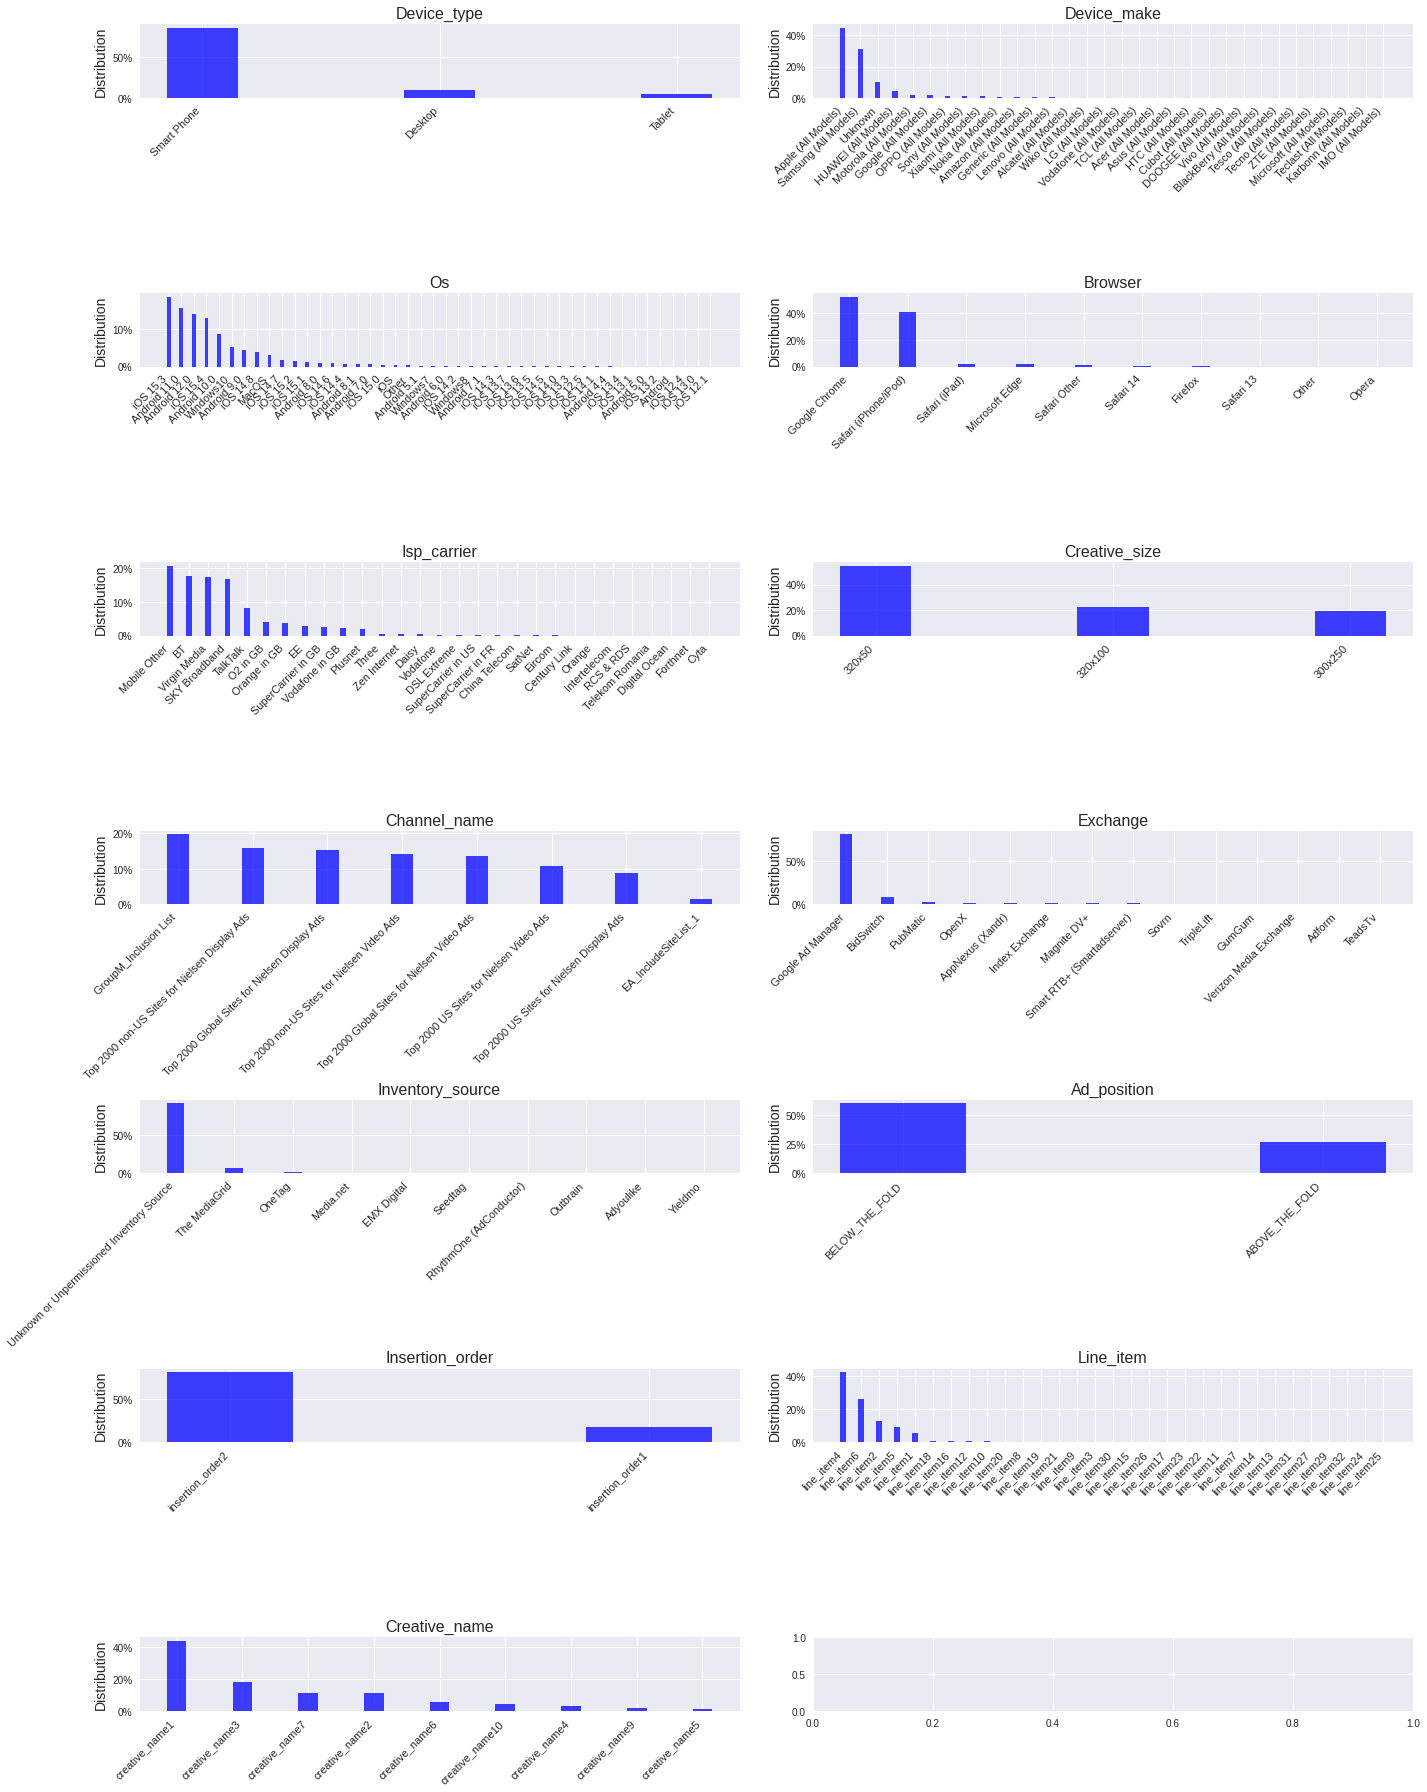

In [38]:
##### Plotting categorical variables with few unique values

### Set up for plotting
fig, axs = plt.subplots(len(catg_list)//2 + 1, 2, figsize=(20, 25)) # Create figure and axes
# fig.set_size_inches(25, 45)


### iter over variables
for idx, var in enumerate(catg_list):
    
    ### creating data form to plot
    
    temp_df = data[[var]] # get feature selected as a df
    temp_df = data.groupby(var, as_index = False).size().rename(columns={'size': 'count'})
    
    ### computing distribution % frequency 
    temp_df['distribution'] = temp_df['count']/temp_df['count'].sum()
    temp_df.sort_values(by = 'count', inplace = True, ascending = False)
    temp_df['cumulative_frequency'] = temp_df['distribution'].cumsum()
    temp_df[var] = temp_df[var].apply(str)
    temp_df = temp_df[temp_df['cumulative_frequency'] <= 0.9999] # Append up to 99.9% cumulative frequency

    
    ### plotting variable distribution
    x_axis = np.arange(len(temp_df[var]))
    yticks = mticker.FormatStrFormatter('%.f%%')

    axs.flat[idx].bar(x_axis, temp_df['distribution']*100, color = colors['c1'][0], width = bar_width, alpha = 0.75)
     
    axs.flat[idx].set_xticks(ticks = x_axis)
    axs.flat[idx].set_xticklabels(temp_df[var], rotation = 45, fontsize = 11, horizontalalignment = 'right') # temp_df[var][::5]
    
    axs.flat[idx].set_ylabel('Distribution', fontsize = size['label'])
    
    axs.flat[idx].set_title(var.capitalize(), fontsize = size['sub_title'])

    axs.flat[idx].yaxis.set_major_formatter(yticks)
    #axs.flat[idx].tick_params(axis = 'both', which = 'major', labelsize = 12)

### fig title and padding
# plt.setp(axs[:, 0], ylabel= 'Distribution')
# fig.suptitle('Figure 1.1: Categorical features distribution - Not multiple unique values',
#             fontsize = size['main_title'],
#             y = 0.99999)
plt.tight_layout(w_pad=2.5, h_pad=0.1)
plt.show()

### 3.4 Distribution categorical features - multiple unique values

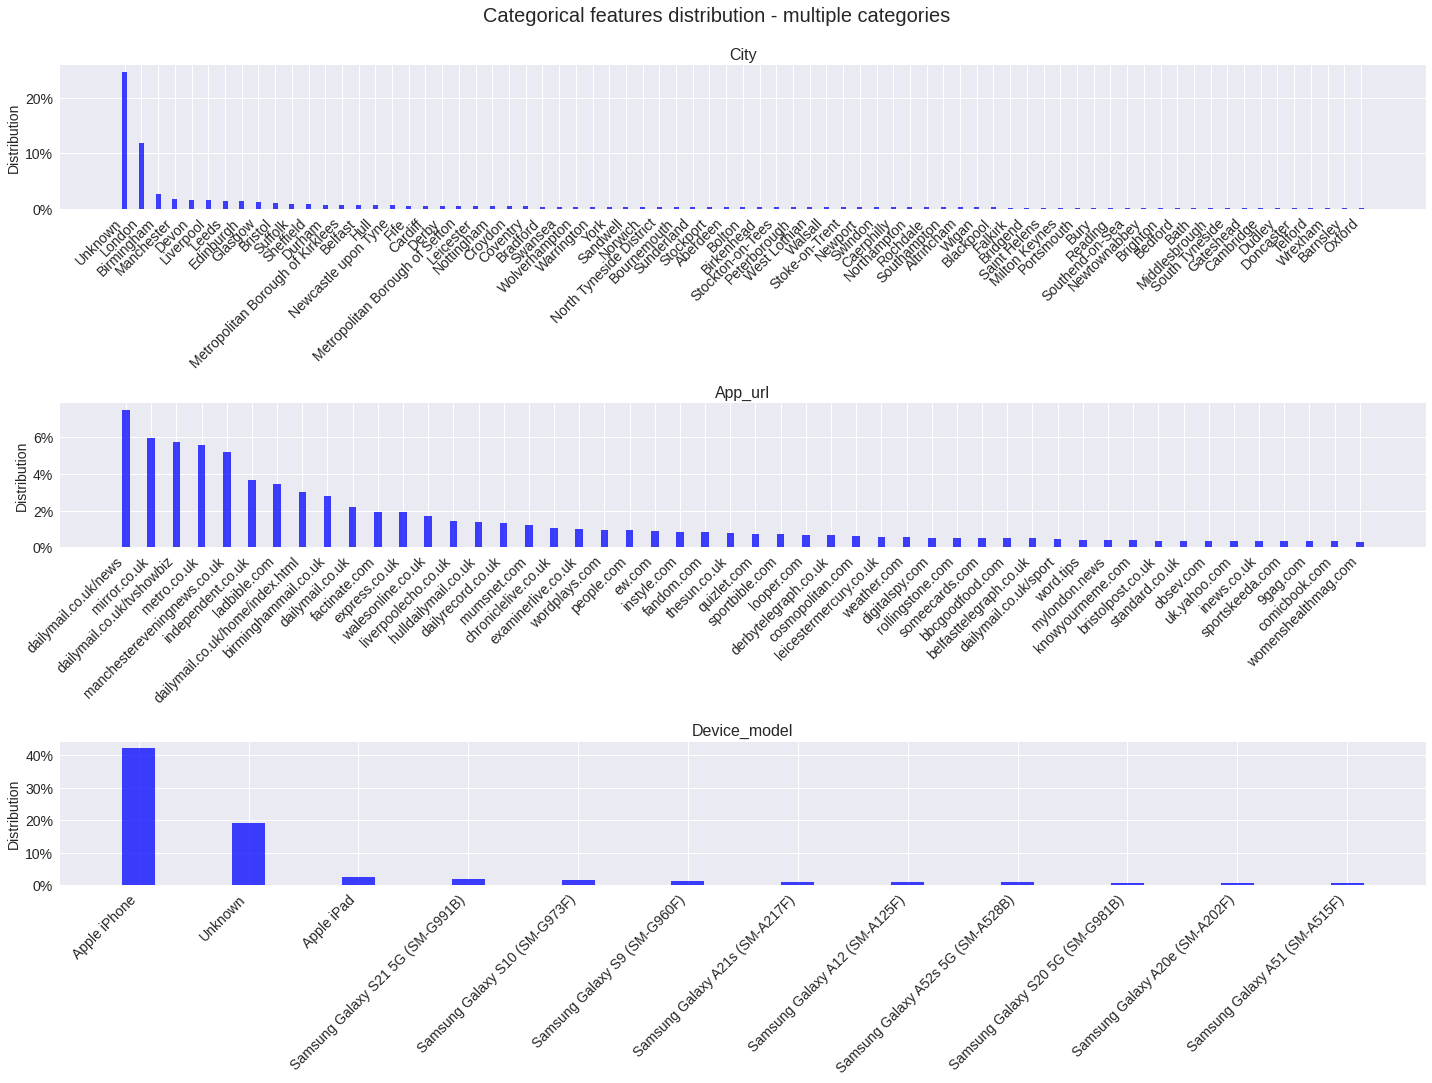

In [42]:
##### Plotting categorical variables with multiple values

### Set up for plotting
fig, axs = plt.subplots(len(multiple_ctg_list), 1, figsize = (20, 15)) # Create figure and axes
# fig.set_size_inches(25, 45)


### iter over variables
for idx, var in enumerate(multiple_ctg_list):
    
    ### creating data form to plot
    
    temp_df = data[[var]] # get feature selected as a df
    temp_df = data.groupby(var, as_index = False).size().rename(columns={'size': 'count'})
    
    ### computing distribution % frequency 
    temp_df['distribution'] = temp_df['count']/temp_df['count'].sum()
    temp_df.sort_values(by = 'count', inplace = True, ascending = False)
    temp_df['cumulative_frequency'] = temp_df['distribution'].cumsum()
    temp_df[var] = temp_df[var].apply(str)
    temp_df = temp_df[temp_df['cumulative_frequency'] <= 0.75] # Append up to 95% cumulative frequency

    
    ### plotting variable distribution
    x_axis = np.arange(len(temp_df[var]))
    yticks = mticker.FormatStrFormatter('%.f%%')

    axs.flat[idx].bar(x_axis, temp_df['distribution']*100, color = colors['c1'][0], width = bar_width, alpha = 0.75)
     
    axs.flat[idx].set_xticks(ticks = x_axis) # x_axis[::3]
    axs.flat[idx].set_xticklabels(temp_df[var], rotation = 45, fontsize = 14, horizontalalignment = 'right') # temp_df[var][::3]
    
    axs.flat[idx].set_ylabel('Distribution', fontsize = 14)
    axs.flat[idx].set_title(var.capitalize(), fontsize = size['sub_title'])

    axs.flat[idx].yaxis.set_major_formatter(yticks)
    axs.flat[idx].tick_params(axis = 'both', which = 'major', labelsize = 14)
    
fig.suptitle('Categorical features distribution - multiple categories', fontsize = size['main_title'], y = 0.9999)
fig.tight_layout(w_pad=2.5, h_pad=1.5)
plt.show()

### 3.5 Distribution numerical features - multiple unique values

In [61]:
##### Plotting numerical variables with multiple values

def num_plots(var_list):
    ### Set up for plotting
    fig, axs = plt.subplots(figsize = (10, 6)) # Create figure and axes
    # fig.set_size_inches(25, 45)


    ### iter over variables
    for idx, var in enumerate(var_list):

        ### plotting variable histograms

        axs.hist(data[var], bins =100 ,color = colors['c1'][0], alpha = 0.75) #width = bar_width

        axs.set_ylabel('frequency', fontsize = size['label'])
        axs.set_title(var.capitalize(), fontsize = size['sub_title'])

        axs.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
        axs.tick_params(axis = 'both', which = 'major', color = 'b', labelsize = size['tick'])

    fig.suptitle(' Media cost and Total media cost distribution', fontsize = size['main_title'], y = 0.9999)
    fig.tight_layout(w_pad=2.5, h_pad=2.5)
    plt.show()

In [62]:
def all_num_plots(var_list):
    for idx, var in enumerate(var_list):
        num_plots([var_list[idx]])

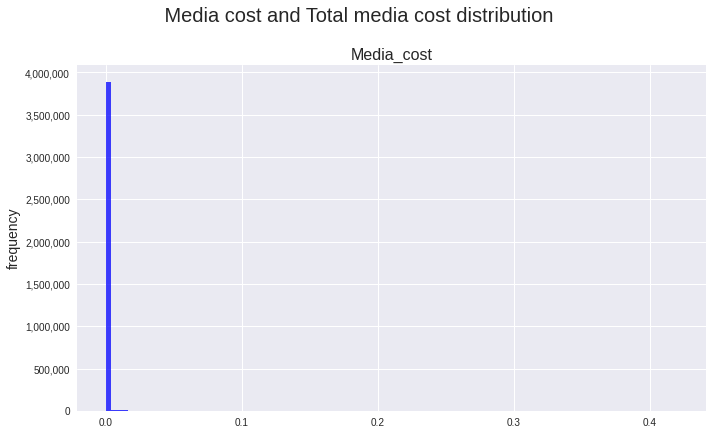

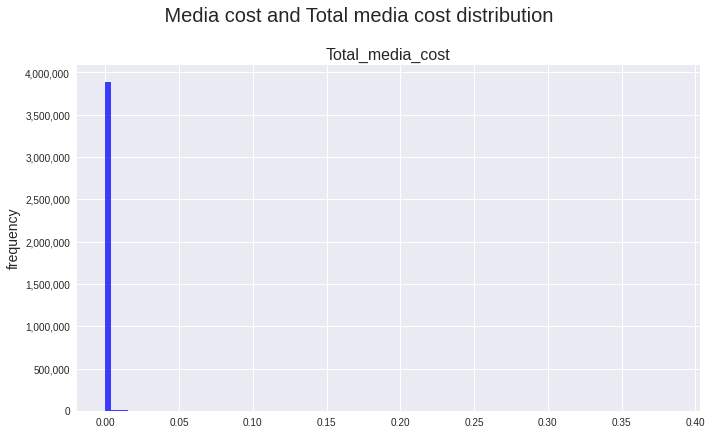

In [63]:
all_num_plots(multiple_num_list)

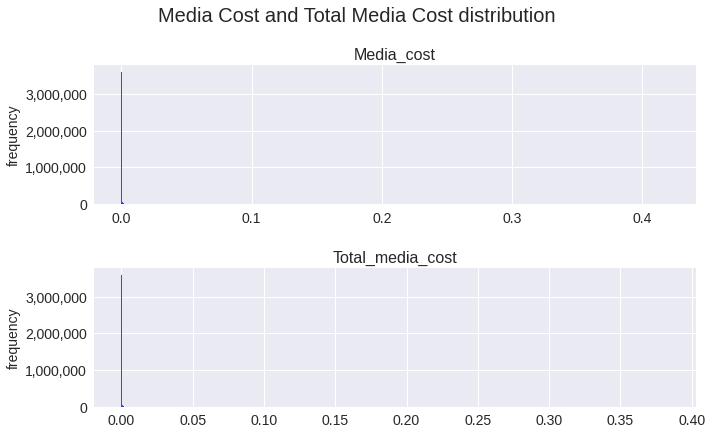

In [69]:
##### Plotting numerical variables with multiple values

### Set up for plotting
fig, axs = plt.subplots(len(multiple_num_list), 1, figsize = (10, 6)) # Create figure and axes
# fig.set_size_inches(25, 45)


### iter over variables
for idx, var in enumerate(multiple_num_list):
        
    ### plotting variable histograms

    axs.flat[idx].hist(data[var], bins =1000 ,color = colors['c1'][0], alpha = 0.75) #width = bar_width
     
    axs.flat[idx].set_ylabel('frequency', fontsize = size['label'])
    axs.flat[idx].set_title(var.capitalize(), fontsize = size['sub_title'])

    axs.flat[idx].yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    axs.flat[idx].tick_params(axis = 'both', which = 'major', color = 'b', labelsize = 14)
    
fig.suptitle('Media Cost and Total Media Cost distribution', fontsize = size['main_title'], y = 0.9999)
fig.tight_layout(w_pad=2.5, h_pad=2.5)
plt.show()

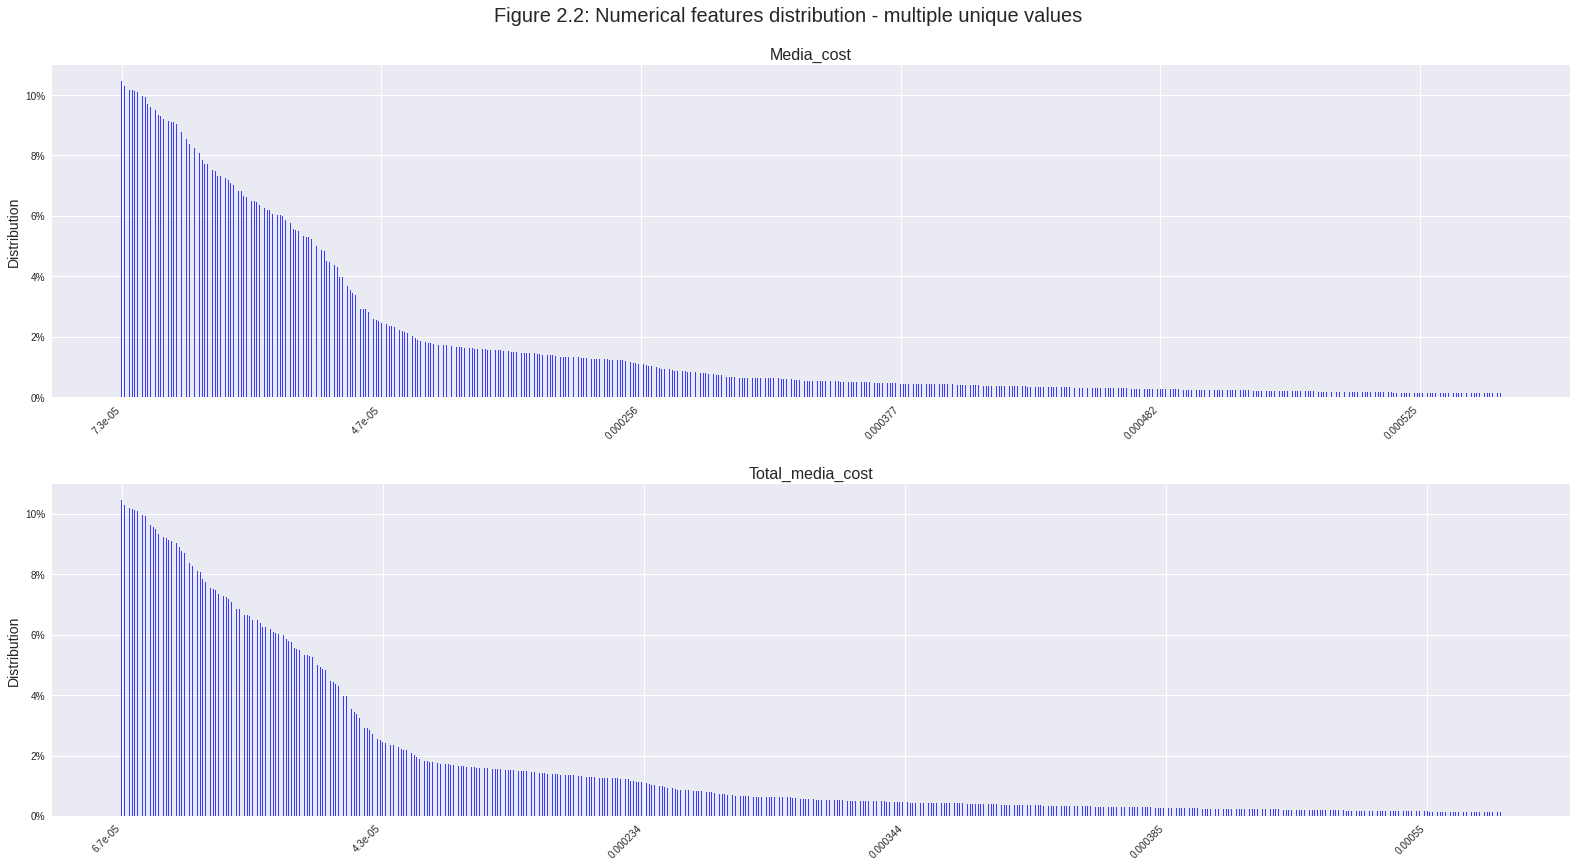

In [39]:
##### Plotting numerical variables with multiple values

### Set up for plotting
fig, axs = plt.subplots(len(multiple_num_list), 1, figsize = (22, 12)) # Create figure and axes
# fig.set_size_inches(25, 45)


### iter over variables
for idx, var in enumerate(multiple_num_list):
    
    ### creating data form to plot
    
    temp_df = data[[var]] # get feature selected as a df
    temp_df = data.groupby(var, as_index = False).size().rename(columns={'size': 'count'})
    
    ### computing distribution % frequency 
    temp_df['distribution'] = temp_df['count']/temp_df['count'].sum()
    temp_df.sort_values(by = 'count', inplace = True, ascending = False)
    temp_df['cumulative_frequency'] = temp_df['distribution'].cumsum()
    temp_df[var] = temp_df[var].apply(str)
    temp_df = temp_df[temp_df['cumulative_frequency'] <= 0.95] # Append up to 95% cumulative frequency

    
    ### plotting variable distribution
    x_axis = np.arange(len(temp_df[var]))
    yticks = mticker.FormatStrFormatter('%.f%%')

    axs.flat[idx].bar(x_axis, temp_df['distribution']*1000, color = colors['c1'][0], width = bar_width, alpha = 0.75)
     
    axs.flat[idx].set_xticks(ticks = x_axis[::100])
    axs.flat[idx].set_xticklabels(temp_df[var][::100], rotation = 45, fontsize = size['tick'], horizontalalignment = 'right')
    
    axs.flat[idx].set_ylabel('Distribution', fontsize = size['label'])
    axs.flat[idx].set_title(var.capitalize(), fontsize = size['sub_title'])

    axs.flat[idx].yaxis.set_major_formatter(yticks)
    axs.flat[idx].tick_params(axis = 'both', which = 'major', color = 'b', labelsize = size['tick'])
    
fig.suptitle('Figure 2.2: Numerical features distribution - multiple unique values', fontsize = size['main_title'], y = 0.9999)
fig.tight_layout(w_pad=2.5, h_pad=2.5)
plt.show()

### 3.6 Time categorical variables

#### Time aggregated data

In [40]:
# compute day of thee week
data['day_of_week'] = data['date'].dt.day_name()

In [41]:
# aggregate at day of the week
temp_df_time = data.groupby(['day_of_week'], as_index = False)['impressions','viewable_impressions','clicks'].sum()
temp_df_time['CTR'] = temp_df_time['clicks']/temp_df_time['impressions']
temp_df_time['day_of_week'] = pd.Categorical(temp_df_time['day_of_week'], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
temp_df_time.sort_values('day_of_week', inplace=True)

# aggregate at time of the day
temp_df_time_2 = data.groupby(['tod'], as_index = False)['impressions','viewable_impressions','clicks'].sum()
temp_df_time_2['CTR'] = temp_df_time_2['clicks']/temp_df_time_2['impressions']
temp_df_time_2['tod'] = temp_df_time_2['tod'].astype(int)
temp_df_time_2.sort_values('tod', inplace=True)

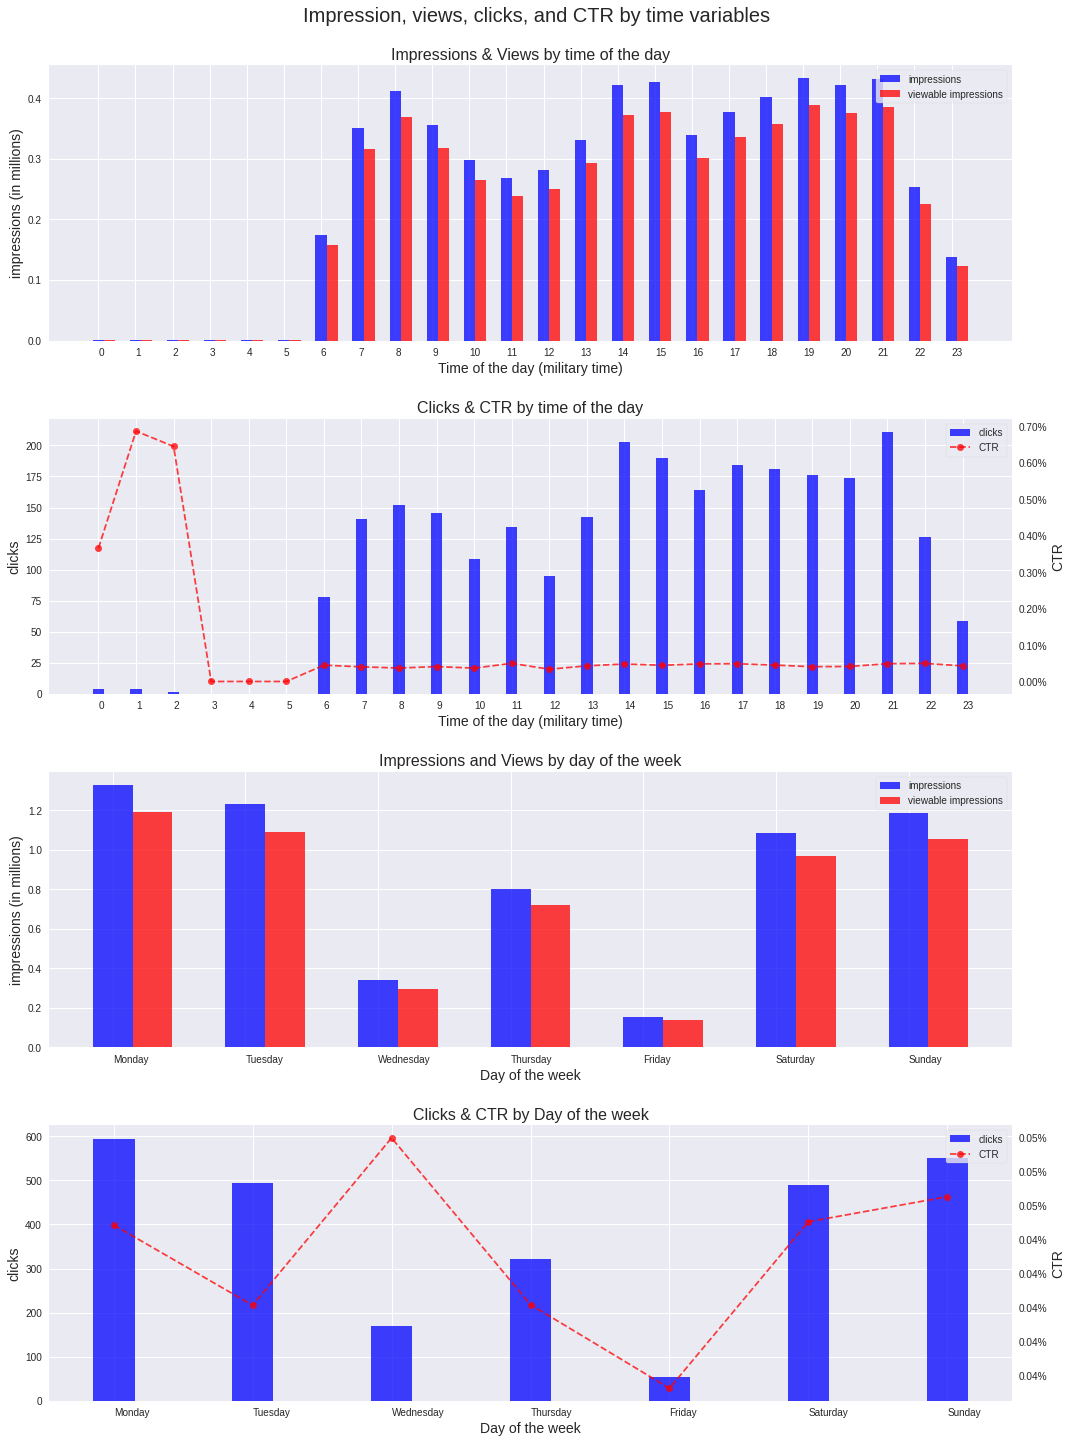

In [42]:
###### Ploting time catgeorical variables

### Set up for plotting
fig, axs = plt.subplots(4, 1, figsize = (15, 20)) # Create figure and axes

### Plot 1 - time of the day
x1_pos = np.arange(len(temp_df_time_2['tod']))
x2_pos = [x+bar_width for x in x1_pos]
x_axis = np.arange(len(temp_df_time_2['tod'])).astype(str)

axs.flat[0].bar(x1_pos, 
                temp_df_time_2['impressions']/1000000, 
                color= colors['c1'][0], 
                label ='impressions', 
                width = bar_width, 
                alpha = 0.75)

axs.flat[0].bar(x2_pos, 
                temp_df_time_2['viewable_impressions']/1000000, 
                color = colors['c1'][1], 
                label = 'viewable impressions', 
                width = bar_width, 
                alpha = 0.75)

# Plot1 configuration
axs.flat[0].set_xticks(x1_pos)
axs.flat[0].set_xlabel('Time of the day (military time)', fontsize = size['label']) # xlabel name
axs.flat[0].set_ylabel('impressions (in millions)', fontsize = size['label']) # ylabel name
axs.flat[0].legend(loc = 'upper right', frameon = True)

axs.flat[0].set_title('Impressions & Views by time of the day', fontsize = size['sub_title'])

axs.flat[0].yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
axs.flat[0].set_xticklabels(x_axis, rotation = 0, fontsize = size['tick'], horizontalalignment = 'left')
axs.flat[0].tick_params(axis = 'both', which = 'major', labelsize = size['tick'])


### Plot 2 - time of the day
p1 = axs.flat[1].bar(x1_pos, 
                temp_df_time_2['clicks'], 
                color = colors['c1'][0] , 
                label = 'clicks', 
                width = bar_width, 
                alpha=0.75)

ax0 = axs.flat[1].twinx()
p2  = ax0.plot(x1_pos, 
                temp_df_time_2['CTR'], 
                color= colors['c1'][1], 
                label= 'CTR', 
                linestyle='--',
                marker='o',
                alpha=0.75)

axs.flat[1].set_xticks(x1_pos)
axs.flat[1].set_xlabel('Time of the day (military time)', fontsize = size['label']) # xlabel name
axs.flat[1].set_ylabel('clicks', fontsize = size['label']) # ylabel name
ax0.set_ylabel('CTR', fontsize = size['label']) # ylabel name

# getting legends for two axis
lines, labels = axs.flat[1].get_legend_handles_labels()
lines2, labels2 = ax0.get_legend_handles_labels()
axs.flat[1].legend(lines + lines2, labels + labels2, loc = 'upper right', frameon = True)

# Turn on the grid
axs.flat[1].minorticks_on()

# Customise the minor grid
ax0.grid(which='major', 
         linestyle=':', 
         linewidth='0.1', 
         color='k'
        )

axs.flat[1].set_title('Clicks & CTR by time of the day', fontsize = size['sub_title'])

axs.flat[1].yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax0.yaxis.set_major_formatter(StrMethodFormatter('{x:,.2%}'))
axs.flat[1].set_xticklabels(x_axis, rotation = 0, fontsize = size['tick'], horizontalalignment = 'left')



#### Plot 3 - day of the week
x1_pos_b = np.arange(len(temp_df_time['day_of_week']))
x2_pos_b = [x+bar_width for x in x1_pos_b]
x_axis_b = temp_df_time['day_of_week'].values


axs.flat[2].bar(x1_pos_b, 
                temp_df_time['impressions']/1000000, 
                color='blue', 
                label='impressions', 
                width = bar_width, 
                alpha=0.75)

axs.flat[2].bar(x2_pos_b, 
                temp_df_time['viewable_impressions']/1000000, 
                color='red', 
                label='viewable impressions', 
                width = bar_width, 
                alpha=0.75)

# Plot 3 configuration
axs.flat[2].set_xticks(x1_pos_b)
axs.flat[2].set_xlabel('Day of the week', fontsize = size['label']) # xlabel name
axs.flat[2].set_ylabel('impressions (in millions)', fontsize = size['label']) #ylabel name
axs.flat[2].legend(loc = 'upper right', frameon = True)

axs.flat[2].set_title('Impressions and Views by day of the week', fontsize = size['sub_title'])

axs.flat[2].yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
axs.flat[2].set_xticklabels(x_axis_b, rotation = 0, fontsize = size['tick'], horizontalalignment = 'left')

x1_pos = np.arange(len(temp_df_time_2['tod']))
x2_pos = [x+bar_width for x in x1_pos]
x_axis = np.arange(len(temp_df_time_2['tod'])).astype(str)

### Plot 4 - day of the week
p1 = axs.flat[3].bar(x1_pos_b, 
                temp_df_time['clicks'], 
                color = colors['c1'][0] , 
                label = 'clicks', 
                width = bar_width, 
                alpha=0.75)

ax0 = axs.flat[3].twinx()
p2  = ax0.plot(x1_pos_b, 
                temp_df_time['CTR'], 
                color= colors['c1'][1], 
                label= 'CTR', 
                linestyle='--',
                marker='o',
                alpha=0.75)

axs.flat[3].set_xticks(x1_pos_b)
axs.flat[3].set_xlabel('Day of the week', fontsize = size['label']) # xlabel name
axs.flat[3].set_ylabel('clicks', fontsize = size['label']) # ylabel name
ax0.set_ylabel('CTR', fontsize = size['label']) # ylabel name

# getting legends for two axis
lines, labels = axs.flat[3].get_legend_handles_labels()
lines2, labels2 = ax0.get_legend_handles_labels()
axs.flat[3].legend(lines + lines2, labels + labels2, loc = 'upper right', frameon = True)

# Turn on the grid
axs.flat[3].minorticks_on()

# Customise the minor grid
ax0.grid(which='major', 
         linestyle=':', 
         linewidth='0.1', 
         color='k'
        )

axs.flat[3].set_title('Clicks & CTR by Day of the week', fontsize = size['sub_title'])

axs.flat[3].yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax0.yaxis.set_major_formatter(StrMethodFormatter('{x:,.2%}'))
axs.flat[3].set_xticklabels(x_axis_b, rotation = 0, fontsize = size['tick'], horizontalalignment = 'left')

    
fig.suptitle('Impression, views, clicks, and CTR by time variables', fontsize = size['main_title'], y = 0.9999)
fig.tight_layout(w_pad=2.5, h_pad=2.5)
plt.show()

### 3.7 Time series plots

#### Campaign performance metrics


In [74]:
# aggregating data at date level
date_df = data.groupby(by=['date']).sum().reset_index()

In [75]:
# computing cost features
date_df['view_rate'] = date_df['viewable_impressions'] / date_df['impressions']
date_df['ctr'] = date_df['clicks'] / date_df['impressions']
date_df['cpm'] = date_df['total_media_cost'] / date_df['impressions'] *1000
date_df['cpc'] = date_df['total_media_cost']/ date_df['clicks']
date_df['cpa'] = date_df['total_media_cost'].div(date_df['total_conversions']).replace(np.inf, 0)

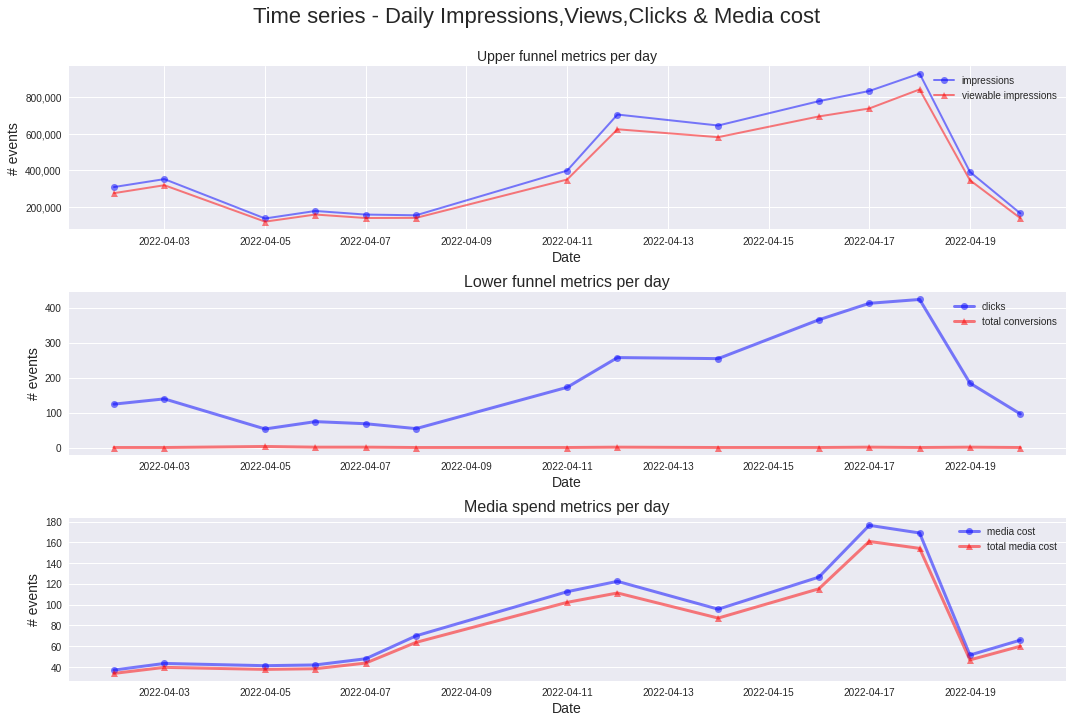

In [86]:
##### Plotting numerical variables in time series form

fig, axs = plt.subplots(3,1, figsize = (15,10)) # sharex = True

# Plot1 time series
axs.flat[0].plot(date_df['date'], date_df['impressions'], color=colors['c1'][0], marker='o',label='impressions', linewidth=2, alpha=0.5)
axs.flat[0].plot(date_df['date'], date_df['viewable_impressions'], color=colors['c1'][1], marker='^',label='viewable impressions', linewidth=2, alpha=0.5)

# Plot1 configuration
# axs.flat[0].grid(color="grey", axis="x", linestyle="-", linewidth=0.25, alpha=0.5)
axs.flat[0].set_xlabel("Date", fontsize = size['label'])
axs.flat[0].set_ylabel('# events', fontsize = size['label']) #ylabel name
axs.flat[0].set_title('Upper funnel metrics per day', fontsize = size['label'])
axs.flat[0].legend(loc="upper right")


axs.flat[0].yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
axs.flat[0].tick_params(axis = 'both', which = 'major', labelsize = size['tick'])

# Plot2 time series
axs.flat[1].plot(date_df['date'], date_df['clicks'], color = colors['c1'][0] , label='clicks', marker='o',linewidth=3, alpha=0.5)
axs.flat[1].plot(date_df['date'], date_df['total_conversions'], color = colors['c1'][1], marker='^',label='total conversions', linewidth=3, alpha=0.5)

# Plot2 configuration
axs.flat[1].grid(color="grey", axis="x", linestyle="-", linewidth=0.25, alpha=0.5)
axs.flat[1].set_xlabel("Date", fontsize = size['label'])
axs.flat[1].set_ylabel('# events', fontsize = size['label']) #ylabel name
axs.flat[1].set_title('Lower funnel metrics per day', fontsize = size['sub_title'])
axs.flat[1].legend(loc="upper right")

axs.flat[1].yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
axs.flat[1].tick_params(axis = 'both', which = 'major', labelsize = size['tick'])

# Plot3 time series
axs.flat[2].plot(date_df['date'], date_df['media_cost'], color = colors['c1'][0] , label='media cost', marker='o',linewidth=3, alpha=0.5)
axs.flat[2].plot(date_df['date'], date_df['total_media_cost'], color = colors['c1'][1], label='total media cost', marker='^',linewidth=3, alpha=0.5)

# Plot3 configuration
axs.flat[2].grid(color="grey", axis="x", linestyle="-", linewidth=0.25, alpha=0.5)
axs.flat[2].set_xlabel("Date", fontsize = size['label'])
axs.flat[2].set_ylabel('# events', fontsize = size['label']) #ylabel name
axs.flat[2].legend(loc="upper right")

axs.flat[2].set_title('Media spend metrics per day', fontsize = size['sub_title'])

axs.flat[2].yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
axs.flat[2].tick_params(axis = 'both', which = 'major', labelsize = size['tick'])


fig.suptitle('Time series - Daily Impressions,Views,Clicks & Media cost', fontsize = 22, y = 0.9999)
fig.tight_layout(w_pad=2.5, h_pad=1)
plt.show()

#### Rate metrics

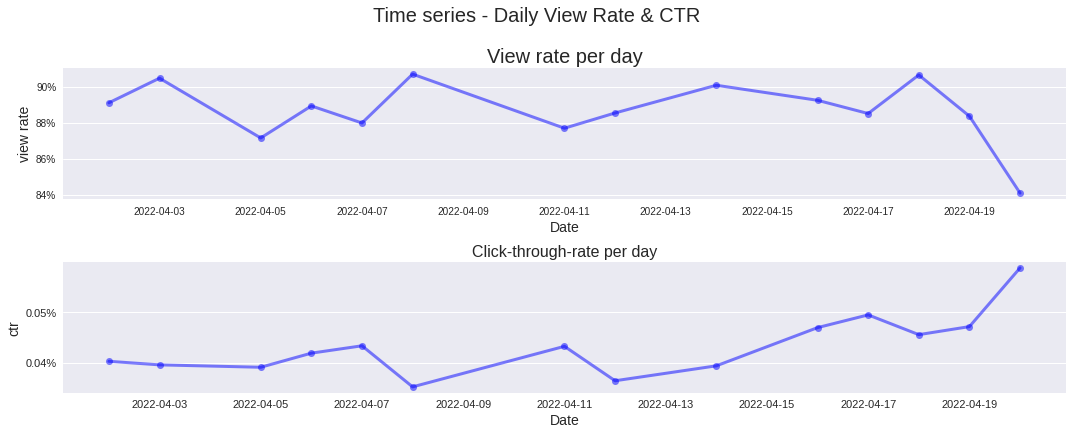

In [87]:
##### Plotting numerical variables in time series form

fig, axs = plt.subplots(2,1, figsize = (15,6)) # sharex = True

yticks_1 = mticker.FormatStrFormatter('%0.f%%')
yticks_2 = mticker.FormatStrFormatter('%0.2f%%')

# Plot1 time series
axs.flat[0].plot(date_df['date'], date_df['view_rate']*100, color=colors['c1'][0], marker='o',label='view_rate', linewidth=3, alpha=0.5)


# Plot1 configuration
axs.flat[0].grid(color="grey", axis="x", linestyle="-",linewidth=0.25, alpha=0.5)
axs.flat[0].set_xlabel("Date", fontsize = size['label'])
axs.flat[0].set_ylabel('view rate', fontsize = size['label']) #ylabel name
# axs.flat[0].legend(loc="upper right")

axs.flat[0].set_title('View rate per day', fontsize = size['main_title'])

axs.flat[0].yaxis.set_major_formatter(yticks_1)
axs.flat[0].tick_params(axis = 'both', which = 'major', labelsize = size['tick'])

# Plot2 time series
axs.flat[1].plot(date_df['date'], date_df['ctr'], color=colors['c1'][0], label='ctr', marker='o',linewidth=3, alpha=0.5)


# Plot2 configuration
axs.flat[1].grid(color="grey", axis="x", linestyle="-",linewidth=0.25, alpha=0.5)
axs.flat[1].set_xlabel("Date", fontsize = size['label'])
axs.flat[1].set_ylabel('ctr', fontsize = size['label']) #ylabel name
axs.flat[1].set_title('Click-through-rate per day', fontsize = size['sub_title'])

axs.flat[1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.2%}'.format(y)))
axs.flat[1].tick_params(axis = 'both', which = 'major', labelsize = 11)


fig.suptitle('Time series - Daily View Rate & CTR', fontsize = size['main_title'],y = 0.9999)
fig.tight_layout(w_pad=2.5, h_pad=1)
plt.show()

#### Cost metrics

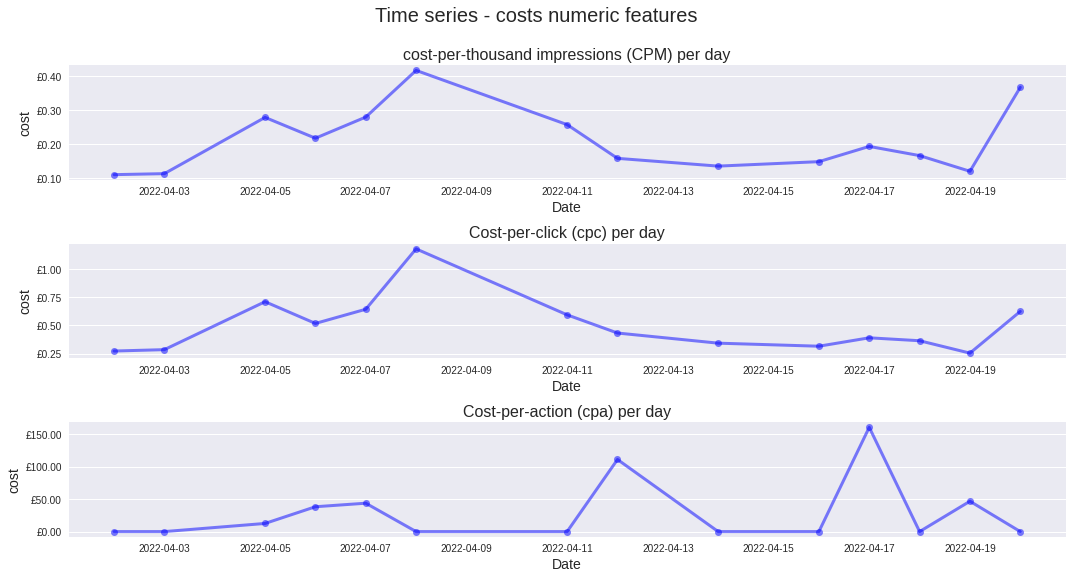

In [47]:
##### Plotting numerical variables in time series form

fig, axs = plt.subplots(3,1, figsize = (15,8)) # sharex = True

yticks = mticker.FormatStrFormatter('£%.2f')


# Plot1 time series
axs.flat[0].plot(date_df['date'], date_df['cpm'], color=colors['c1'][0], label='cpm', marker='o',linewidth=3, alpha=0.5)

# Plot1 configuration
axs.flat[0].grid(color="grey", axis="x", linestyle="-", linewidth=0.25, alpha=0.5)
axs.flat[0].set_xlabel("Date", fontsize = size['label'])
axs.flat[0].set_ylabel('cost', fontsize = size['label']) #ylabel name
axs.flat[0].set_title('cost-per-thousand impressions (CPM) per day', fontsize = size['sub_title'])

axs.flat[0].yaxis.set_major_formatter(yticks)
axs.flat[0].tick_params(axis = 'both', which = 'major', labelsize = size['tick'])

# Plot2 time series
axs.flat[1].plot(date_df['date'], date_df['cpc'], color=colors['c1'][0], label='cpc', marker='o',linewidth=3, alpha=0.5)

# Plot2 configuration
axs.flat[1].grid(color="grey", axis="x", linestyle="-", linewidth=0.25, alpha=0.5)
axs.flat[1].set_xlabel("Date", fontsize = size['label'])
axs.flat[1].set_ylabel('cost', fontsize = size['label']) #ylabel name
axs.flat[1].set_title('Cost-per-click (cpc) per day', fontsize = size['sub_title'])

axs.flat[1].yaxis.set_major_formatter(yticks)
axs.flat[1].tick_params(axis = 'both', which = 'major', labelsize = size['tick'])

# Plot3 time series
axs.flat[2].plot(date_df['date'], date_df['cpa'], color=colors['c1'][0], label='cpa', marker='o',linewidth=3, alpha=0.5)

# Plot3 configuration
axs.flat[2].grid(color="grey", axis="x", linestyle="-", linewidth=0.25, alpha=0.5)
axs.flat[2].set_xlabel("Date", fontsize = size['label'])
axs.flat[2].set_ylabel('cost', fontsize = size['label']) #ylabel name
axs.flat[2].set_title('Cost-per-action (cpa) per day', fontsize = size['sub_title'])

axs.flat[2].yaxis.set_major_formatter(yticks)
axs.flat[2].tick_params(axis = 'both', which = 'major', labelsize = size['tick'])


fig.suptitle('Time series - costs numeric features', fontsize = size['main_title'], y = 0.9999)
fig.tight_layout()
plt.show()

### 3.8 Events flow through conversion funnnel visualization

In [73]:
#### Sankey diagram plot

# defining source and target
source = [0,                # Impressions
          1,                # billable impressions
          2, 2, 2, 2]       # viewable impressions       

target = [1, 
          2, 
          3, 4, 5, 6]       # clicks, post-click, post-view, total conversion

# computing flow rates through conversion funnel
value = [ len(data[(data['impressions'] > 0) & (data['billable_impressions'] > 0)]),
         len(data[(data['impressions'] > 0) & (data['viewable_impressions'] > 0)]),
         len(data[data['clicks'] > 0]), len(data[data['post_click_conversions'] > 0]), len(data[data['post_view_conversions'] > 0]), len(data[data['total_conversions'] > 0])]

# set up labels
labels = ['Impressions', 
         'Billable Impressions',
         'Viewable Impressions',  
         'Clicks', 
         'Post-click conversions',
         'Post-view conversions', 
         'Total conversions']

color_node = [
'#3B3B3B', 
'#003366', '#33CC66', '#48C9B0', '#660066']

color_link = [
'#C5C5C5', '#b2c1d1', '#99e5b2','#EC7063', '#EC7063',
'#F7DC6F', '#F7DC6F']

# '#EC7063', '#EC7063',
# '#F7DC6F', '#F7DC6F',
# '#48C9B0', '#48C9B0', '#48C9B0', '#48C9B0', '#48C9B0', '#48C9B0',
# '#AF7AC5', '#AF7AC5', '#AF7AC5'

# Sankey plot
opacity = 0.4
link = dict(source = source, target = target, value = value, color = color_link)
node = dict(label = labels, pad = 15, thickness = 5, color = color_node)
sankey_data = go.Sankey(link = link, node = node)
# plot
fig = go.Figure(sankey_data)
fig.update_layout(title_text = 'Instances flows through conversion funnel')#,
                  #font_size = 22)
fig.show()

#### conversion rates in each step of the funnel

In [49]:
# initialize data values to feed conversion metrics df
billable_rate = len(data[(data['impressions'] > 0) & (data['billable_impressions'] > 0)])/len(data)
view_rate = len(data[(data['impressions'] > 0) & (data['viewable_impressions'] > 0)])/len(data)
ctr = len(data[(data['clicks'] > 0)])/len(data)
conversion_rate = len(data[(data['total_conversions'] > 0)])/len(data)

# create dict
funnel_conversions_dic = {'Conversion metric': ['billable-rate','View-rate', 'Click-through-rate', 'Conversion-rate'],
        'value': [billable_rate,view_rate,ctr,conversion_rate]}
 
# Create conversion metrics df
funnel_df = pd.DataFrame(funnel_conversions_dic)
funnel_df

Conversion metric     value
0       billable-rate  0.997664
1           View-rate  0.882218
2  Click-through-rate  0.000677
3     Conversion-rate  0.000002

## 4 Feature Engineering


### 4.1 log transformations

In [52]:
#log transformation for media cost variables
data['media_cost_log'] = np.log(data['media_cost']+0.00001)
data['total_media_cost_log'] = np.log(data['total_media_cost']+0.00001)

log_multiple_num_list = ['media_cost_log', 'total_media_cost_log']

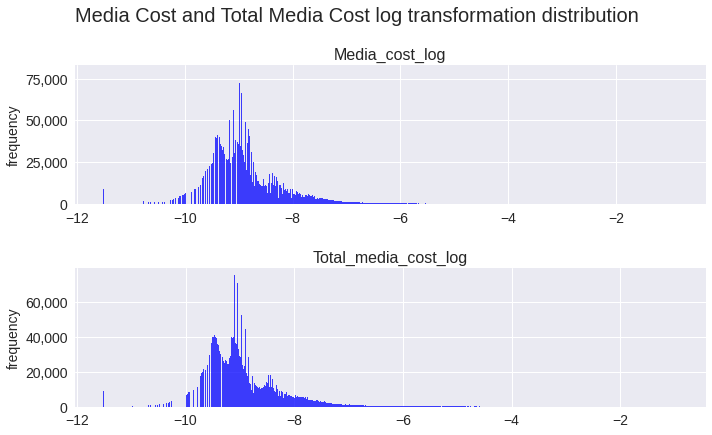

In [72]:
##### Plotting numerical variables with multiple values

### Set up for plotting
fig, axs = plt.subplots(len(log_multiple_num_list), 1, figsize = (10, 6)) # Create figure and axes
# fig.set_size_inches(25, 45)

log_multiple_num_list = ['media_cost_log', 'total_media_cost_log']

### iter over variables
for idx, var in enumerate(log_multiple_num_list):
        
    ### plotting variable histograms

    axs.flat[idx].hist(data[var], bins =1000 ,color = colors['c1'][0], alpha = 0.75) #width = bar_width
     
    axs.flat[idx].set_ylabel('frequency', fontsize = size['label'])
    axs.flat[idx].set_title(var.capitalize(), fontsize = size['sub_title'])

    axs.flat[idx].yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    axs.flat[idx].tick_params(axis = 'both', which = 'major', color = 'b', labelsize = 14)
    
fig.suptitle('Media Cost and Total Media Cost log transformation distribution', fontsize = size['main_title'], y = 0.9999)
fig.tight_layout(w_pad=2.5, h_pad=2.5)
plt.show()

In [52]:
data['media_cost_log'].unique()

array([ -8.91023578, -10.05431044,  -9.44606271, ...,  -4.51945131,
        -4.3262514 ,  -4.44705594])

In [60]:
#keep log transformation features
data.drop(['media_cost', 'total_media_cost'], axis = 1, inplace = True)

### 4.2 Day of the week

In [61]:
#created day of the week feature
data['day_of_week'] = data['date'].dt.day_name()

### 4.3 Target feature - user response

In [62]:
data['user_response'] = np.where(data['clicks'] == 0, 0, 1) # generates target feature

### 4.4 Date to text

In [63]:
data['date'] = data['date'].dt.strftime('%d/%m/%Y')

In [64]:
data.shape

(3924294, 31)

## Pipeline

In [65]:
data_num = data.select_dtypes(include = ["float64","int64"]).columns.tolist()
data_catg = data.select_dtypes(include = ["bool","object"]).columns.tolist()

In [ ]:
### Create data pipeline

# get user responser target feature into y
y = data['user_response'].to_numpy()

# get lists of numeric and categorical features to fit pipeline
num_features = data.select_dtypes(include = ["float64","int64"]).columns.tolist()
catg_features = data.select_dtypes(include = ["bool","object"]).columns.tolist()

# NUM_VARIABLES = ['age', 'experience_years', 'gender', 'previous_experience']
# CAT_VARIABLES = ['level', 'education']

# Data Pipeline for numeric features
pipeline_numb = Pipeline([('scaler', StandardScaler())])

# Data Pipeline for categorical features
pipeline_catg = Pipeline([
        ('encoder', OneHotEncoder(drop = 'first', sparse = False)),
        ('scaler', StandardScaler())
])

# Build general pipeline and process data
pipeline = ColumnTransformer([
        ('numeric', pipeline_numb, num_features),
        ('categorical', pipeline_catg, catg_features)
])

X = pipeline.fit_transform(data)

# Print input (-1 correcting for target variable)
print('Shape of input X dataframe: %s instances, %s features' % data.drop(columns = ['user_response']).shape)
print('')
print('Shape of output array: %s instances, %s features' % X.shape)

## Correlation matrices

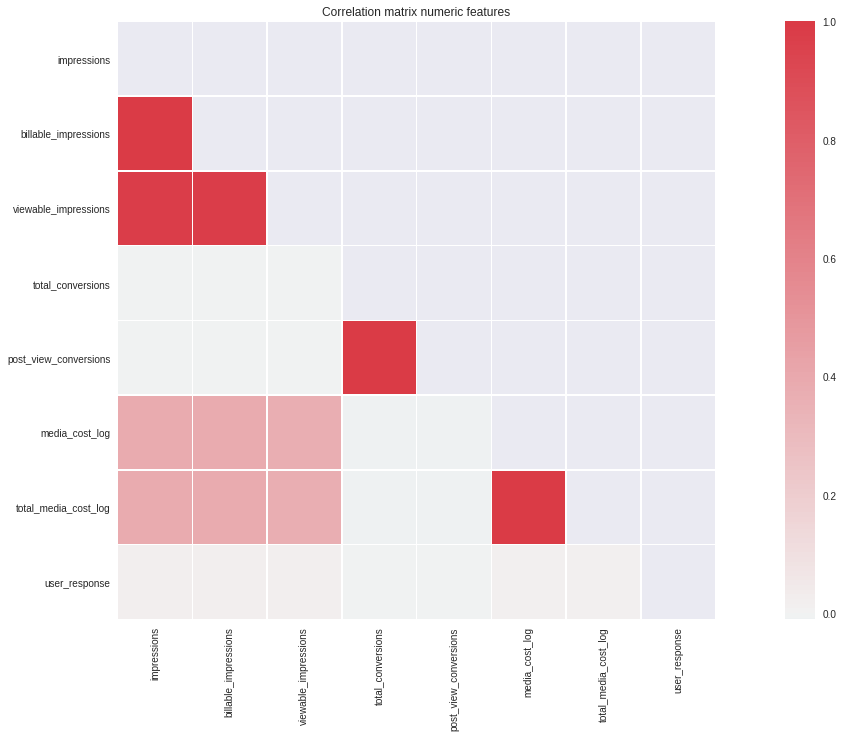

In [7]:
# Plot correlation matrix

# get numeric features
X_num = X_complete.iloc[:,:7]

# define df for nuemric features
df_eda = pd.merge(X_num, y_complete, how = 'left',left_index = True,right_index = True)

CORR_TABLE = np.round(df_eda.corr(), 2)

# Create mask
CORR_MASK = np.zeros_like(CORR_TABLE, dtype = np.bool)
CORR_MASK[np.triu_indices_from(CORR_MASK, k = 0)] = True # True only for upper triangle

# Generate colormap
CMAP = sns.diverging_palette(220, 10, as_cmap = True)

# Initialise figure
fig, ax = plt.subplots(figsize = (25, 11))

# Draw heatmap
sns.heatmap(CORR_TABLE,
            mask = CORR_MASK,
            cmap = CMAP,
            center = 0, 
            annot = False,
            square = True,
            linewidths = 0.5) 

plt.title('Correlation matrix numeric features', fontsize =12)

fig.show()

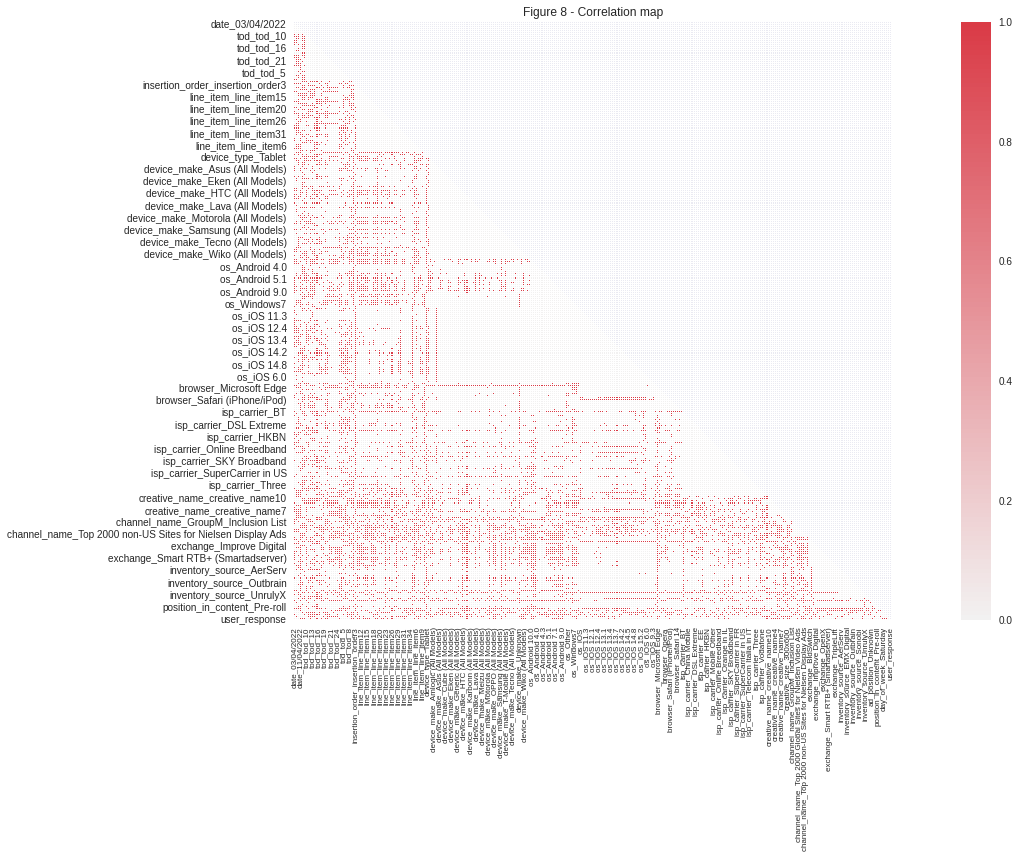

In [45]:
# Plot correlation matrix

# define transformed catgeorical features
X_catg = X_complete.iloc[:,10:]

# define df for categorical features
df_eda_cat = pd.merge(X_catg, y_complete,
                       how = 'left',
                       left_index = True,
                       right_index = True)

CORR_TABLE = np.round(df_eda_cat.corr()>0 , 2)

# Create mask
CORR_MASK = np.zeros_like(CORR_TABLE, dtype = np.bool)
CORR_MASK[np.triu_indices_from(CORR_MASK, k = 0)] = True # True only for upper triangle

# Generate colormap
CMAP = sns.diverging_palette(220, 10, as_cmap = True)

# Initialise figure
fig, ax = plt.subplots(figsize = (25, 11))

# Draw heatmap
ht = sns.heatmap(CORR_TABLE,
            mask = CORR_MASK,
            cmap = CMAP,
            center = 0, 
            annot = False,
            square = True,
            linewidths = 0.01) 

ht.set_yticklabels(ht.get_yticklabels(), rotation = 0, fontsize = 10)
ht.set_xticklabels(ht.get_xticklabels(), rotation = 90, fontsize = 8)

plt.title('Correlation matrix categorical features', fontsize = 12)

fig.show()

## Plotting categorical features unique graphs

In [35]:
##### Plotting categorical variables with few unique values

### iter over variables
def plot_distributions(var_list):
    ### Set up for plotting
    fig, axs = plt.subplots(figsize=(10,11)) # Create figure and axes (10, 6)

    for idx, var in enumerate(var_list):

        ### creating data form to plot

        temp_df = data[[var]] # get feature selected as a df
        temp_df = data.groupby(var, as_index = False).size().rename(columns={'size': 'count'})

        ### computing distribution % frequency 
        temp_df['distribution'] = temp_df['count']/temp_df['count'].sum()
        temp_df.sort_values(by = 'count', inplace = True, ascending = False)
        temp_df['cumulative_frequency'] = temp_df['distribution'].cumsum()
        temp_df[var] = temp_df[var].apply(str)
        temp_df = temp_df[temp_df['cumulative_frequency'] <= 0.9999] # Append up to 99.9% cumulative frequency


        ### plotting variable distribution
        x_axis = np.arange(len(temp_df[var]))
        yticks = mticker.FormatStrFormatter('%.f%%')

        axs.bar(x_axis, temp_df['distribution']*100, color = colors['c1'][0], width = bar_width, alpha = 0.75)

        axs.set_xticks(ticks = x_axis)
        axs.set_xticklabels(temp_df[var], rotation = 45, fontsize = 11, horizontalalignment = 'right') # temp_df[var][::5]

        axs.set_ylabel('Distribution', fontsize = size['label'])

        axs.set_title(var.capitalize(), fontsize = size['sub_title'])

        axs.yaxis.set_major_formatter(yticks)

        return plt.show()
        

In [36]:
def all_plots(var_list):
    for idx, var in enumerate(var_list):
        plot_distributions([var_list[idx]])

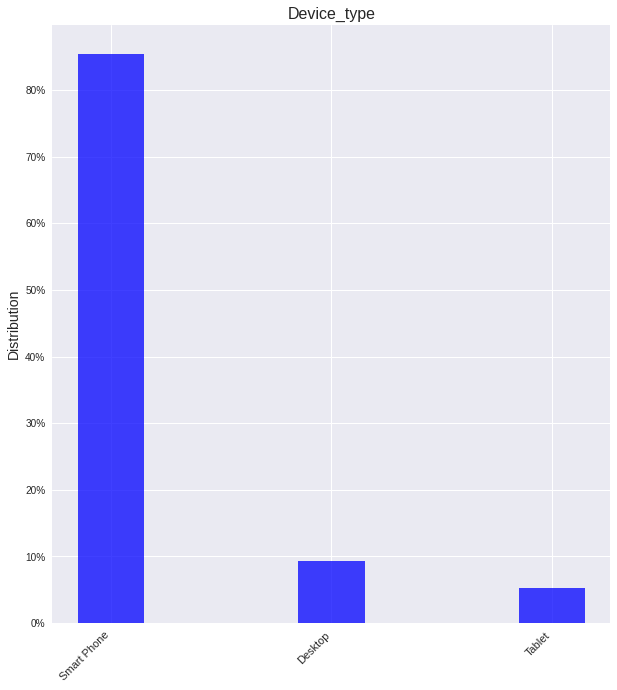

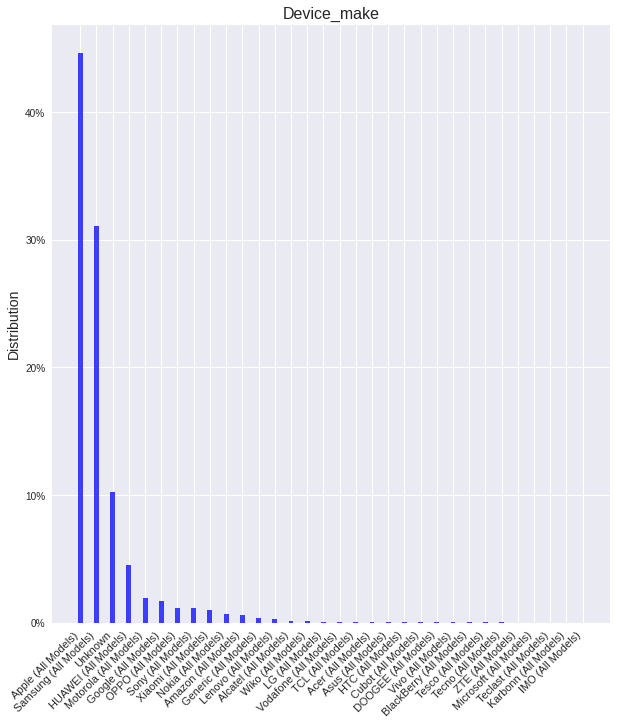

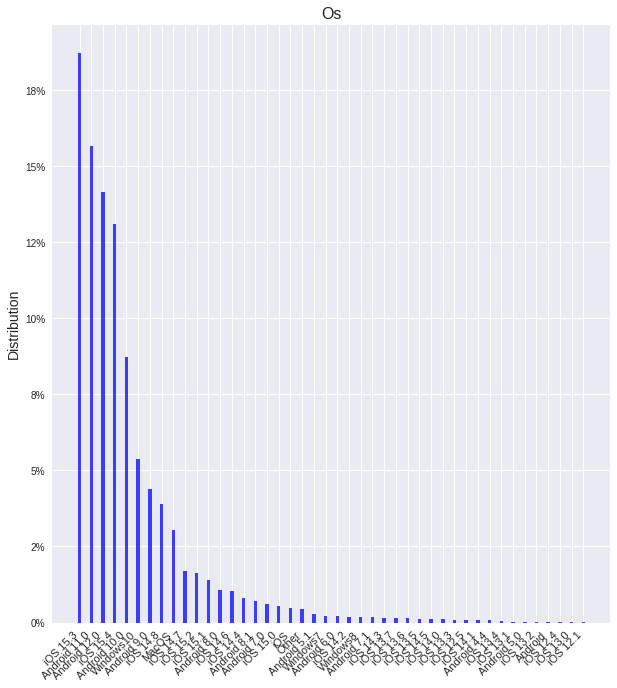

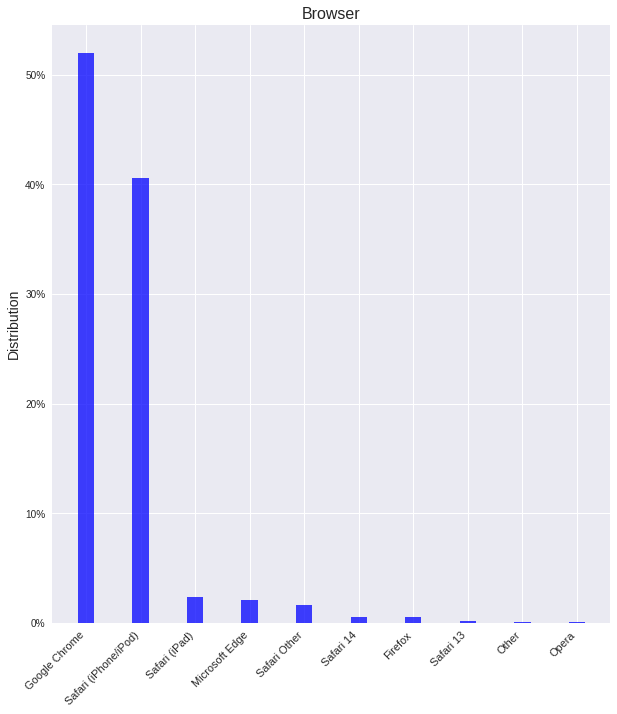

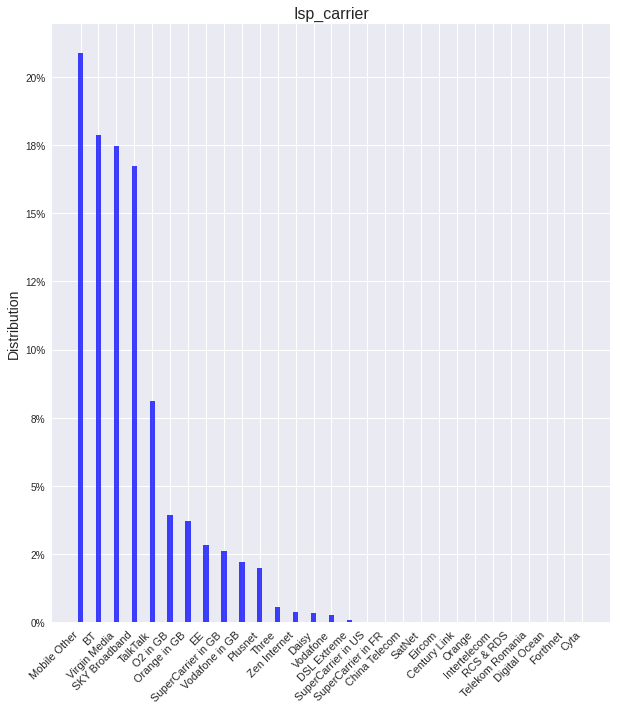

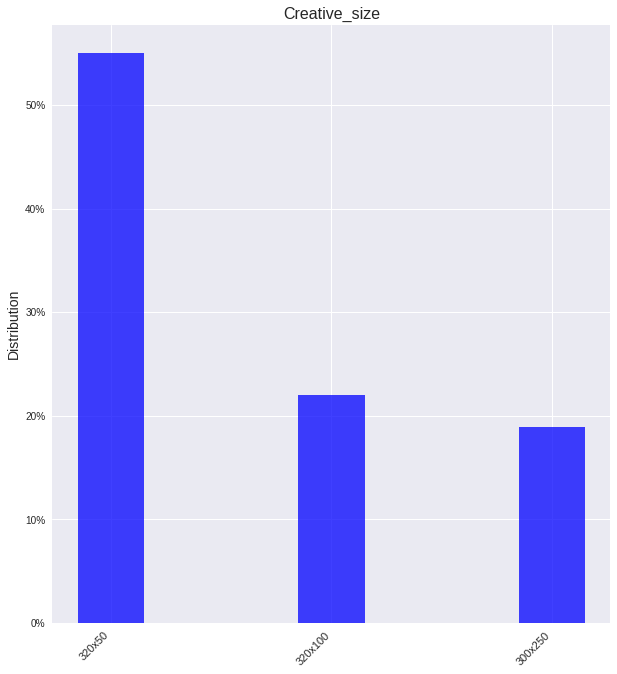

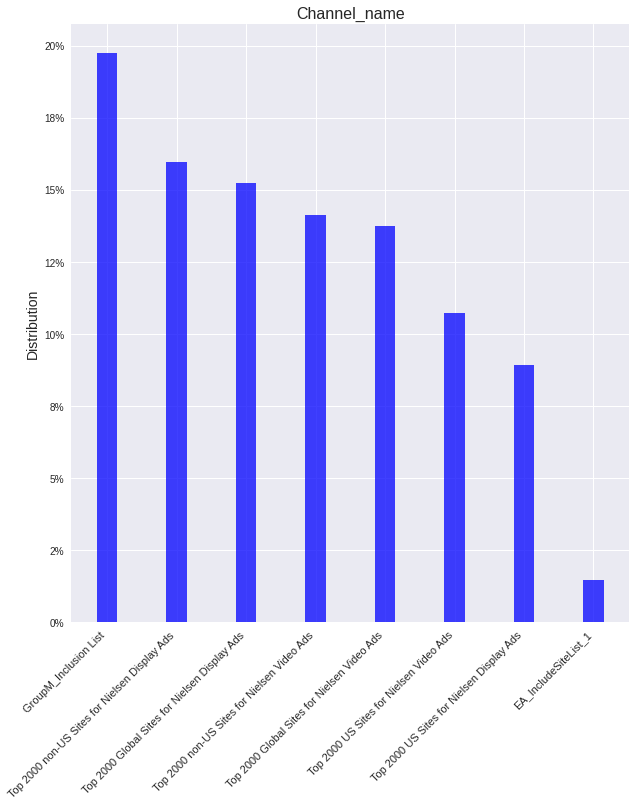

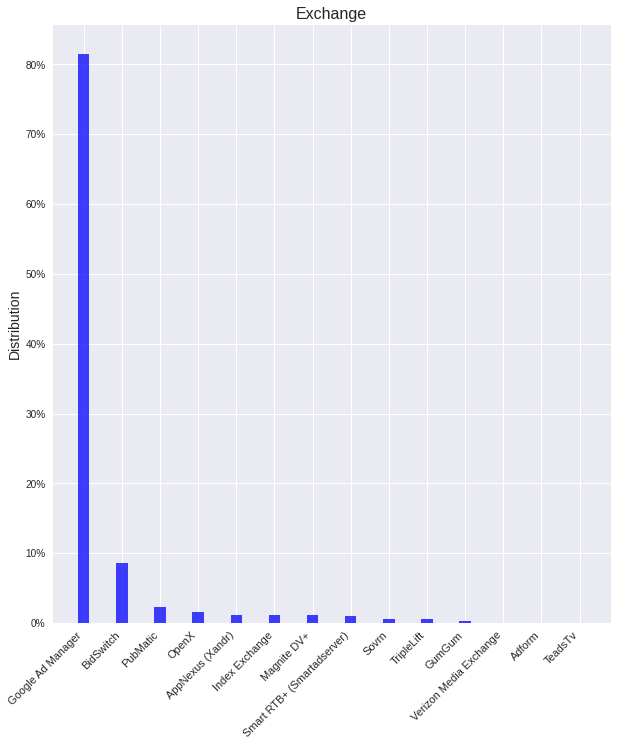

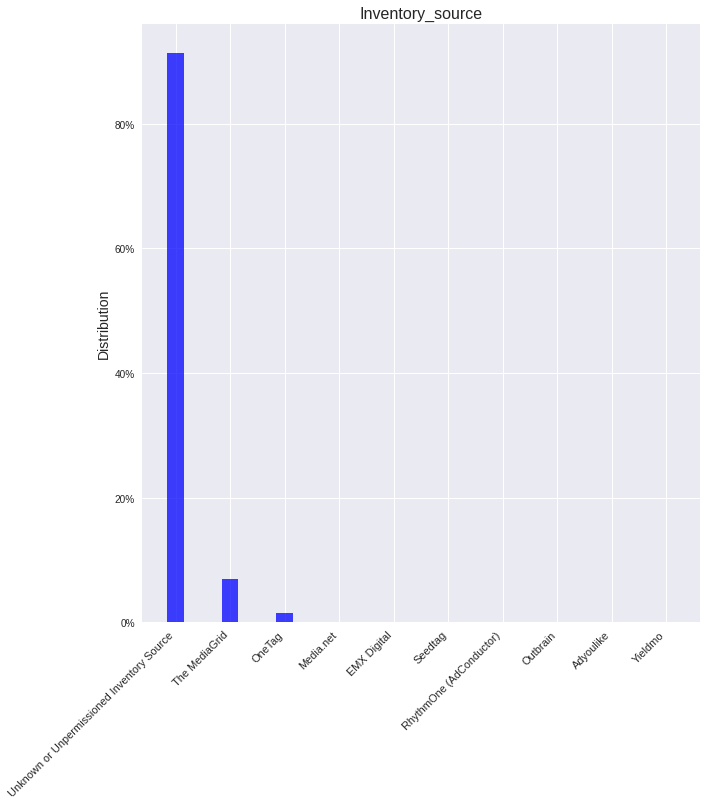

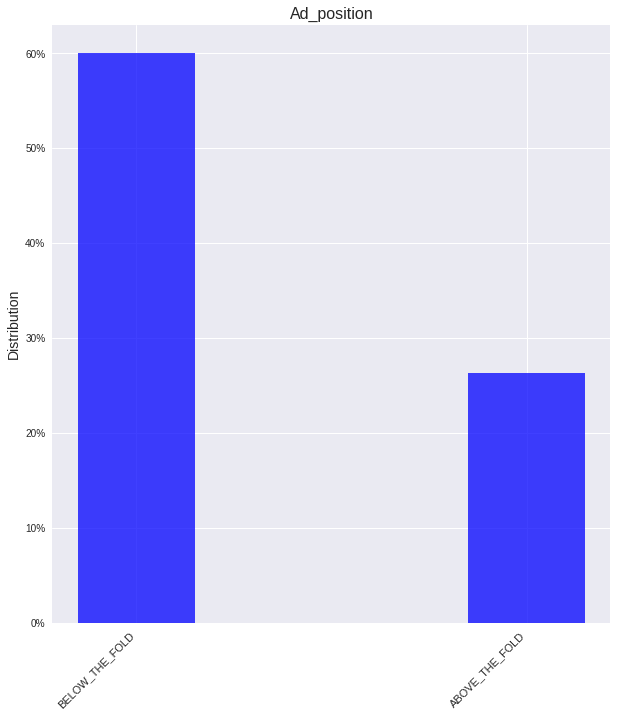

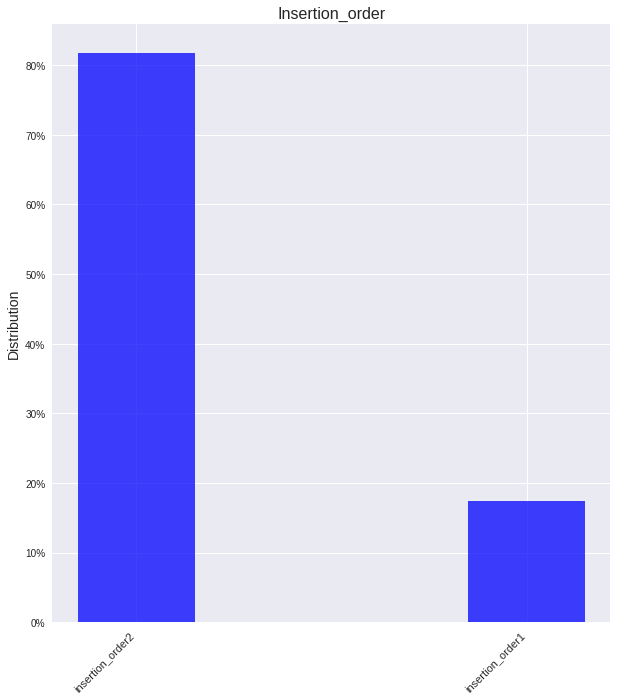

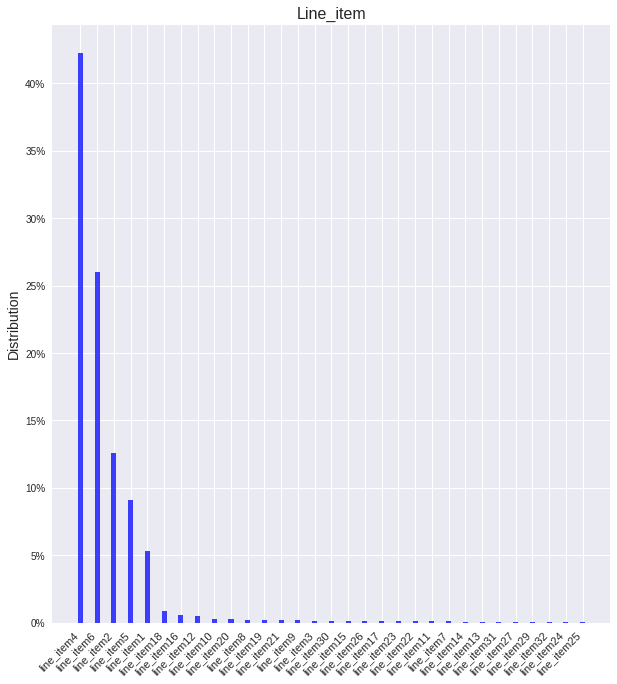

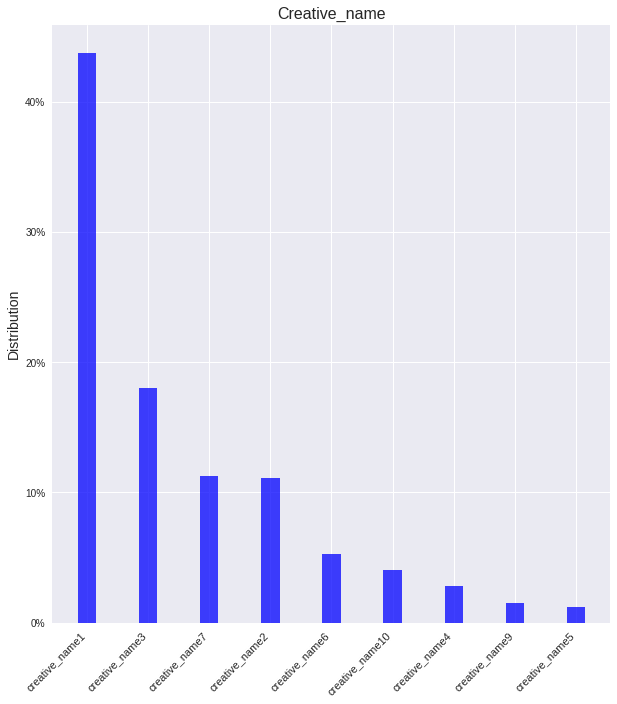

In [37]:
all_plots(catg_list)

## Understanding possible classes

In [ ]:
# percentage of instances with 0 spend
len(data[data['total_media_cost'] == 0]) / len(data)

In [ ]:
# percentage of instances with 0 spend and greater than zero viewable impressions
len(data[(data['total_media_cost'] == 0) & (data['viewable_impressions'] > 0)]) / len(data)

In [ ]:
# percentage of instances with 0 views but with greater than zero spend
len(data[(data['total_media_cost'] == 0) & (data['viewable_impressions'] == 0)]) / len(data)

In [ ]:
# percentage of instances with 0 impressions but with greater than zero spend
len(data[(data['total_media_cost'] > 0) & (data['viewable_impressions'] == 0)]) / len(data)

In [ ]:
len(data[(data['total_media_cost'] > 0) & (data['viewable_impressions'] == 0)])

In [ ]:
len(data[(data['total_media_cost'] > 0) & (data['clicks'] > 0)])

In [ ]:
len(data[(data['total_conversions'] > 0)])

# Appendix


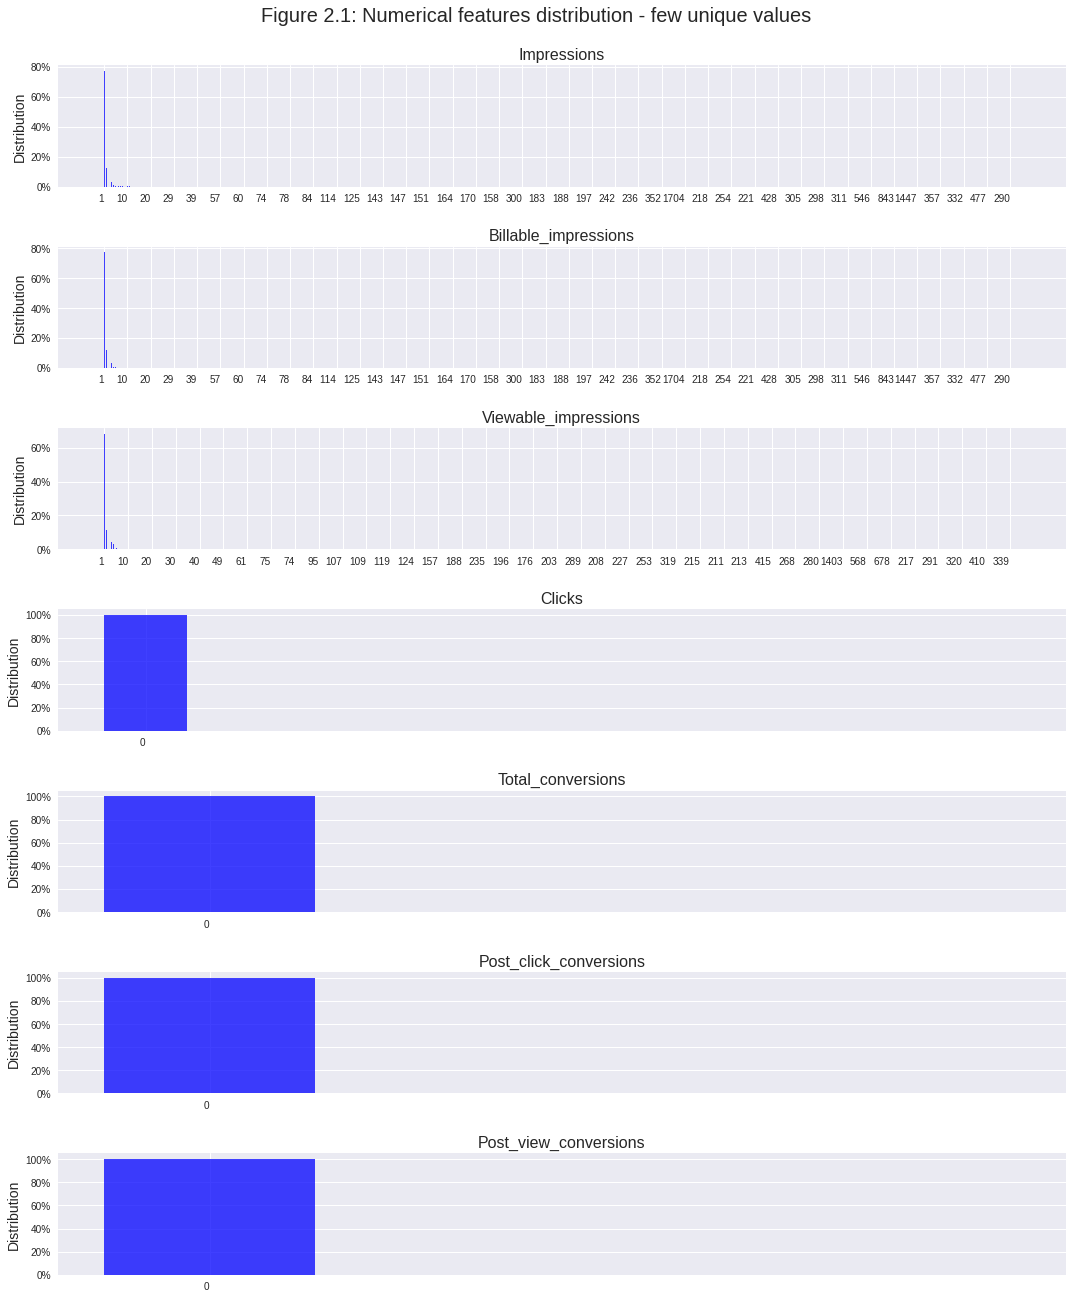

In [53]:
##### Plotting numerical variables with multiple values

### Set up for plotting
fig, axs = plt.subplots(len(num_list), 1, figsize = (15, 18)) # Create figure and axes
# fig.set_size_inches(25, 45)


### iter over variables
for idx, var in enumerate(num_list):
    
    ### creating data form to plot
    
    temp_df = data[[var]] # get feature selected as a df
    temp_df = data.groupby(var, as_index = False).size().rename(columns={'size': 'count'})
    
    ### computing distribution % frequency 
    temp_df['distribution'] = temp_df['count']/temp_df['count'].sum()
    temp_df.sort_values(by = 'count', inplace = True, ascending = False)
    temp_df['cumulative_frequency'] = temp_df['distribution'].cumsum()
    temp_df[var] = temp_df[var].apply(str)
#     temp_df = temp_df[temp_df['cumulative_frequency'] <= 0.9999999] # Append up to 95% cumulative frequency

    
    ### plotting variable distribution
    x_axis = np.arange(len(temp_df[var]))
    yticks = mticker.FormatStrFormatter('%.f%%')

    axs.flat[idx].bar(x_axis, temp_df['distribution']*100, color = colors['c1'][0], width = bar_width, alpha = 0.75)
     
    axs.flat[idx].set_xticks(ticks = x_axis[::10])
    axs.flat[idx].set_xticklabels(temp_df[var][::10], rotation = 0, fontsize = size['tick'], horizontalalignment = 'right')
    
    axs.flat[idx].set_ylabel('Distribution', fontsize = size['label'])
    axs.flat[idx].set_title(var.capitalize(), fontsize = size['sub_title'])

    axs.flat[idx].yaxis.set_major_formatter(yticks)
    axs.flat[idx].tick_params(axis = 'both', which = 'major', labelsize = size['tick'])
    
fig.suptitle('Figure 2.1: Numerical features distribution - few unique values', fontsize = size['main_title'],y = 0.9999)
fig.tight_layout(w_pad=2.5, h_pad=2.5)
plt.show()

## Pyplot  timeseries examples

In [129]:
date = date_df.index
num_actions = date_df[['impressions', 'viewable_impressions']].columns

fig = px.line(date_df, x = date, y = num_actions)

fig.update_layout(
    title = 'Figure 3.1: Time series Upper Funnel Metrics',
    xaxis_tickformat = '%d %B (%a)<br>%Y',
    xaxis_title="Date",
    yaxis_title="# of events",
    legend_title="Upper funnel metric",
)

# fig.update_xaxes(
#     #dtick="D1", # sets minimal interval to day
#     tickformat = "%d/%m/%Y", # the date format you want 
#       xaxis_tickformat = '%d %B (%a)<br>%Y',
# )


# fig.update_layout(
#     title="Plot Title",
#     xaxis_title="X Axis Title",
#     yaxis_title="Y Axis Title",
#     legend_title="Legend Title",
#     font=dict(
#         family="Courier New, monospace",
#         size=18,
#         color="RebeccaPurple"
#     )
    
fig.show()

In [ ]:
# drop truncated instances
data = data.drop(data[data['Advertiser Currency'] == 'Group By:'].index, axis = 0).reindex()
# Check for not remaining truncated instances
print(F"Instances truncated {len(data[data['Advertiser Currency'] == 'Group By:'])}, representing {len(data[data['Advertiser Currency'] == 'Group By:'])/len(data)*100:.0%} of total data set.")

In [ ]:
### data aggregation for plotting

temp_df = data[['ad_currency']] # get feature selected as a df
temp_df = temp_df.groupby('ad_currency', as_index = False).size().rename(columns={'size': 'count'})
# temp_df
temp_df['distribution'] = temp_df['count']/temp_df['count'].sum()
temp_df.sort_values(by = 'count', inplace = True, ascending = False)
temp_df['cumulative_frequency'] = temp_df['distribution'].cumsum()
temp_df['ad_currency'] = temp_df['ad_currency'].apply(str)
# Append up to 99.9% cumulative frequency
temp_df = temp_df[temp_df['cumulative_frequency'] <= 0.999]

In [ ]:
temp_df = data[['ad_currency']] # get feature selected as a df
temp_df = temp_df.groupby('ad_currency', as_index = False).size().rename(columns={'size': 'count'})
temp_df['distribution'] = temp_df['count']/temp_df['count'].sum()
temp_df.sort_values(by = 'count', inplace = True, ascending = False)
temp_df['cumulative_frequency'] = temp_df['distribution'].cumsum()

temp_df

Text(0.5, 1.0, 'Custom violinplot 1')

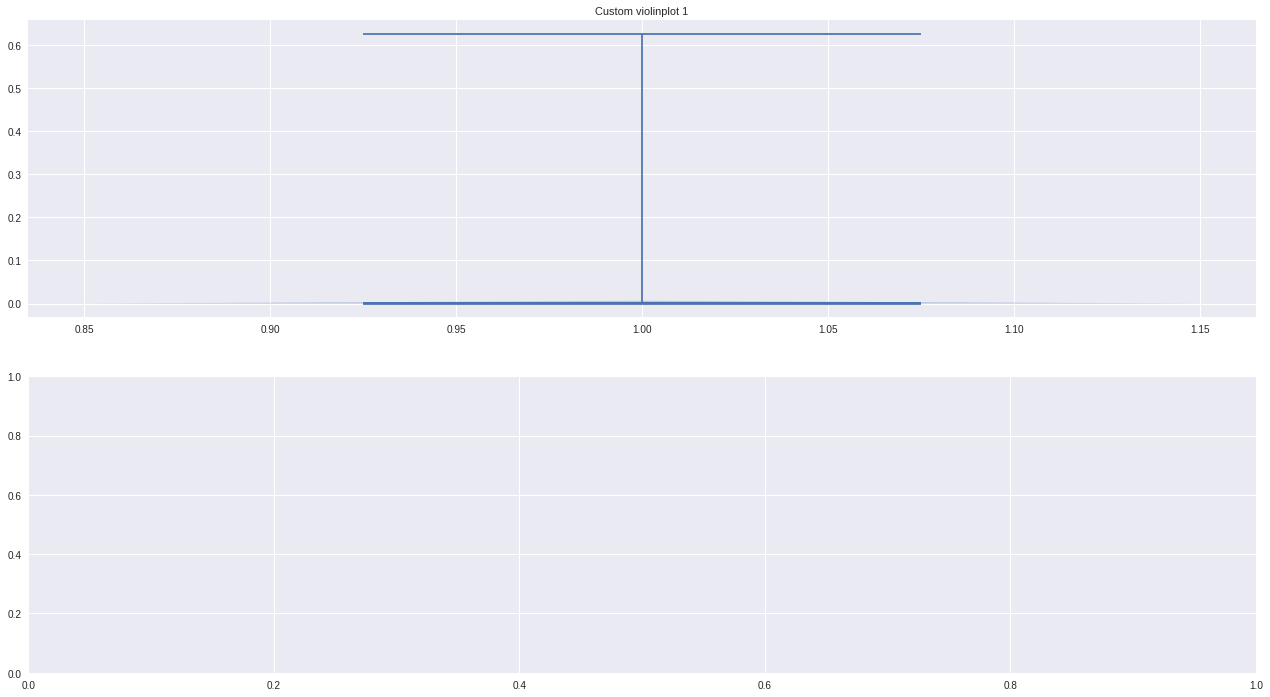

In [173]:
fig, axs = plt.subplots(2, 1, figsize = (22, 12)) # Create figure and axes

axs.flat[0].violinplot(data['media_cost'],points=100, widths=0.3,
                     showmeans=True, showextrema=True, showmedians=True)

axs.flat[0].set_title('Custom violinplot 1', fontsize=11)